# Part 1.1: Plotting Trees in Barcelona

Importing our data and translate

In [1]:
import pandas as pd
barcelona_trees = pd.read_csv('/users/laurence/downloads/arbrat_zona.csv')
#get list of columns to translate
column_names = []
for col in barcelona_trees.columns:
    column_names.append(col)

column_translations = ['Code', 'X_Coordinates', 'Y_Coordinates', 'LAT', 'LONG', 'Type', 'Green_Space', 'Address',
                      'Height', 'Species ID', 'Scientific_Name', 'Castellan Name', 'Catalan Name', 'Tree Categoy', 
                      'Wide Sidewalk', 'Data Plantation', 'Water Type', 'Irrigation Type', 'Superficie Type',
                      'Support Type', 'Coverage of gangway', 'Size of gangway', 'Edge of Gangway']

column_dict = dict(zip(column_names, column_translations))
column_dict

barcelona_trees=barcelona_trees.rename(columns = column_dict)
barcelona_trees.head()

#key info:
#46925 rows × 23 columns

Code  X_Coordinates  Y_Coordinates        LAT      LONG          Type  \
0  0000002AR     430310.290    4587826.297  41.438986  2.165807  PALMERA ZONA   
1  0000008AR     430286.284    4587772.394  41.438498  2.165526  PALMERA ZONA   
2  0000011AR     430283.101    4587767.264  41.438452  2.165488  PALMERA ZONA   
3  0000019AR     430304.163    4587711.846  41.437955  2.165747  PALMERA ZONA   
4  0001140AR     430485.344    4587434.544  41.435473  2.167947    ARBRE ZONA   

                                         Green_Space  \
0  Can Ensenya, C.V. (Fabra i Puig 439, Villalba ...   
1  Can Ensenya, C.V. (Fabra i Puig 439, Villalba ...   
2  Can Ensenya, C.V. (Fabra i Puig 439, Villalba ...   
3  Can Ensenya, C.V. (Fabra i Puig 439, Villalba ...   
4                        Central de Nou Barris, Parc   

                    Address   Height  Species ID       ...         \
0      Pg Fabra i Puig, 449   PETITA        1155       ...          
1      Pg Fabra i Puig, 441  MITJANA         636       ...          
2      Pg Fabra i Puig, 441  MITJANA         636       ...          
3  C\ Vilalba dels Arcs, 94   PETITA        1155       ...          
4            Pg Urrutia, 70     GRAN         563       ...          

  Tree Categoy Wide Sidewalk Data Plantation Water Type  Irrigation Type  \
0      PRIMERA           NaN             NaN        NaN         ASPERSIÓ   
1       SEGONA           NaN             NaN        NaN         ASPERSIÓ   
2       SEGONA           NaN             NaN        NaN           MÀNEGA   
3      PRIMERA           NaN             NaN        NaN         ASPERSIÓ   
4       SEGONA           NaN             NaN        NaN          DIFUSIÓ   

  Superficie Type      Support Type Coverage of gangway  \
0           GESPA          PARTERRE                 NaN   
1           GESPA          PARTERRE                 NaN   
2        PAVIMENT  ESCOCELL QUADRAT     SENSE COBERTURA   
3           GESPA          PARTERRE                 NaN   
4           GESPA          PARTERRE                 NaN   

               Size of gangway  Edge of Gangway  
0                          NaN              NaN  
1                          NaN              NaN  
2  major que o igual a  100 cm  VORA METÀL·LICA  
3                          NaN              NaN  
4                          NaN              NaN  

[5 rows x 23 columns]

Null Values: What is the most relevant data for us to use?

In [2]:
barcelona_trees.isnull().sum()

Code                       0
X_Coordinates              0
Y_Coordinates              0
LAT                        0
LONG                       0
Type                       0
Green_Space             5100
Address                    0
Height                  3707
Species ID                 0
Scientific_Name            0
Castellan Name           767
Catalan Name             814
Tree Categoy            1199
Wide Sidewalk          37786
Data Plantation        44593
Water Type             45420
Irrigation Type           27
Superficie Type         4449
Support Type            4956
Coverage of gangway    16141
Size of gangway        37665
Edge of Gangway        14870
dtype: int64

In [3]:
#Scope 1: plot coordinates onto map. All we need is: long, lat; species ID; scientific name; Type; 
barcelona_trees1 = barcelona_trees[['Species ID', 'Scientific_Name','Type','LAT','LONG']]
barcelona_trees1.head()

Species ID     Scientific_Name          Type        LAT      LONG
0        1155  Chamaerops humilis  PALMERA ZONA  41.438986  2.165807
1         636      Yucca gigantea  PALMERA ZONA  41.438498  2.165526
2         636      Yucca gigantea  PALMERA ZONA  41.438452  2.165488
3        1155  Chamaerops humilis  PALMERA ZONA  41.437955  2.165747
4         563        Tipuana tipu    ARBRE ZONA  41.435473  2.167947

In [4]:
#importing relevant libraries
import shapefile as shp
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
from pandas import DataFrame


Create Geometry Points from our lat and long coordinates

In [5]:
#1. convert long lat coordinates to Points
#2. put this in a geodataframe

tree_points = barcelona_trees[["LONG", "LAT"]].apply(lambda row:
            Point(row["LONG"], row["LAT"]), axis =1)
geo_tree_points = gpd.GeoDataFrame({"geometry": tree_points})


geo_tree_points.head()

geometry
0  POINT (2.1658066 41.4389859)
1  POINT (2.1655255 41.4384984)
2   POINT (2.165488 41.4384519)
3  POINT (2.1657465 41.4379546)
4  POINT (2.1679469 41.4354727)

Plot these points onto a base map

Text(0.5, 1.0, 'Tree points of Barcelona')

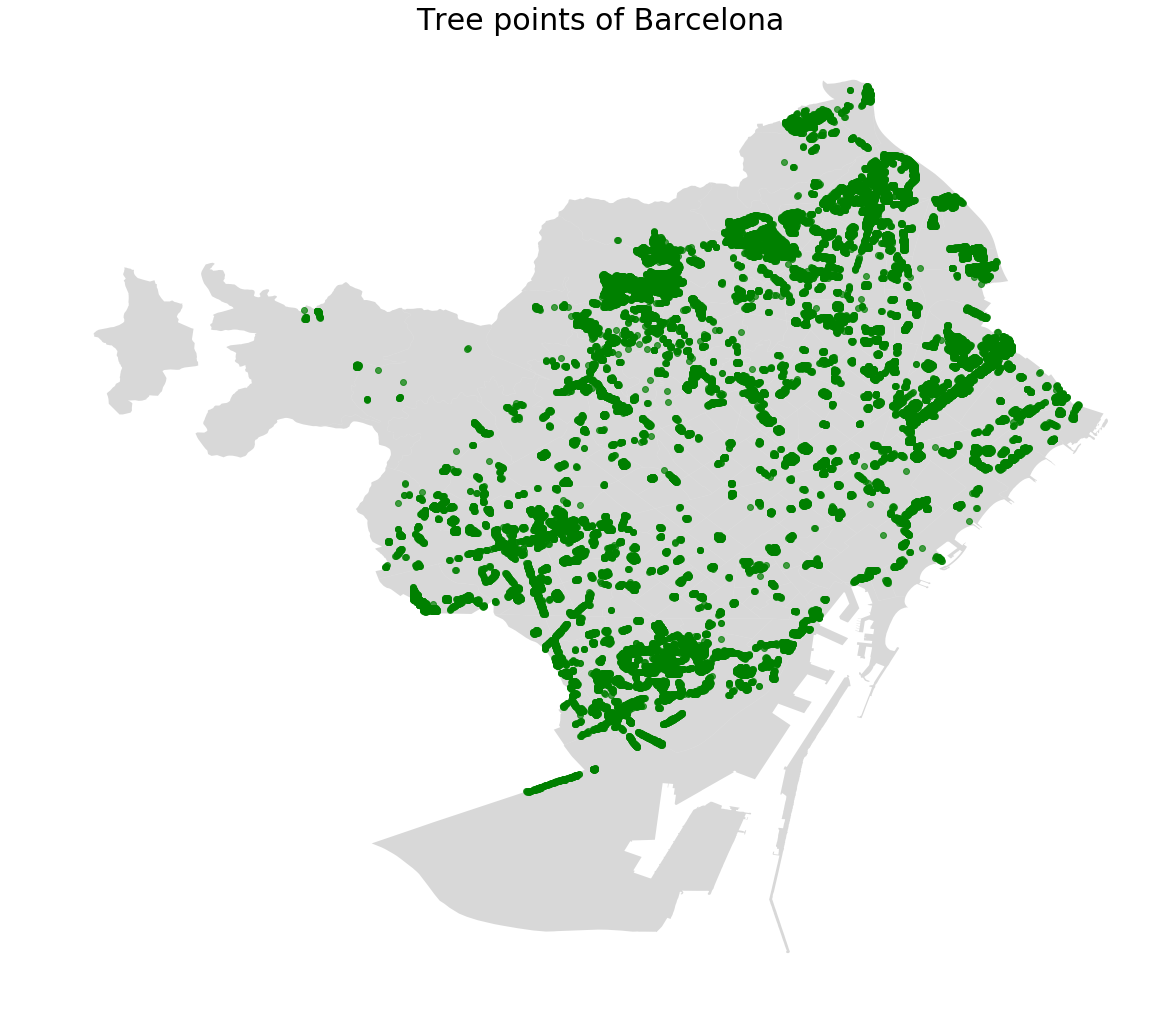

In [6]:
street_map = gpd.read_file('/Users/laurence/Downloads/area-estadistica-basica.geojson')
fig,ax = plt.subplots(1, figsize = (20,20))
base = street_map.plot(ax=ax, color='gray', alpha=0.3)
geo_tree_points.plot(ax=base, color='green',alpha=0.7)
_ = ax.axis("off")
ax.set_title("Tree points of Barcelona", fontsize=30)

# Part 1.2 Plot for different types of Trees

Determine the number of unique tree types and most relevant ones for analysis

In [7]:
#List of different types of trees types by scientific name
len(barcelona_trees['Scientific_Name'].unique().tolist())

327

In [8]:
unique_count = barcelona_trees['Scientific_Name'].value_counts()
df_counts = pd.value_counts(barcelona_trees.Scientific_Name).to_frame().reset_index()
df_counts.columns = ['Scientific_Name', 'Count']
df_counts['Percentage_of_Total(%)'] = round(df_counts['Count']/len(barcelona_trees)*100,2)
df_counts.head()
#Select top 5 tree types

Scientific_Name  Count  Percentage_of_Total(%)
0            Tipuana tipu   4032                    8.59
1             Pinus pinea   2924                    6.23
2    Platanus x hispanica   2486                    5.30
3  Cupressus sempervirens   2350                    5.01
4        Pinus halepensis   2273                    4.84

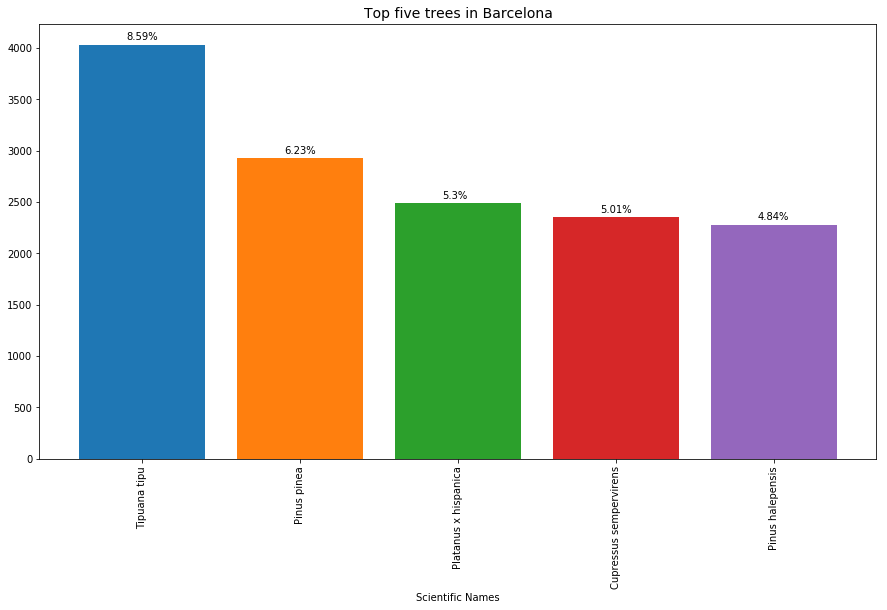

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_top5 = barcelona_trees.Scientific_Name.value_counts()[0:5]

ax = df_top5.plot(kind='bar', figsize=(15,8), width = 0.8)
ax.set_title("Top five trees in Barcelona", fontsize = 14)
ax.set_xlabel ("Scientific Names", fontsize = 10)

percentage_totals = []
count = 0

for i in ax.patches:
    ax.text(i.get_x()+0.3, i.get_height()+50, \
            str(round(df_top5[count]/len(barcelona_trees)*100,2))+'%')
    count = count+1

Sorting coordinates into different geoseries

In [10]:
class TypeofTree:
    
    def __init__(self, treetype):
        self.treetype = treetype
    
    def PlotPoints(self, DataFrame, Category, Color):
        tree_type_points= DataFrame[DataFrame[Category].str.match(self.treetype)]
        coordinates = tree_type_points[["LONG", "LAT"]].apply(lambda row: Point(row["LONG"], row["LAT"]), axis =1)
        geocoordinates=gpd.GeoDataFrame({"geometry":coordinates})
        street_map = gpd.read_file('/Users/laurence/Downloads/barris.geojson')
        fig,ax = plt.subplots(1, figsize = (20,20))
        base = street_map.plot(ax=ax, color='gray', alpha=0.3)
        new_map = geocoordinates.plot(ax=base, color=Color,alpha=0.7)
        _ = ax.axis("off")
        ax.set_title(f"{self.treetype} Tree Points of Barcelona")
        return new_map

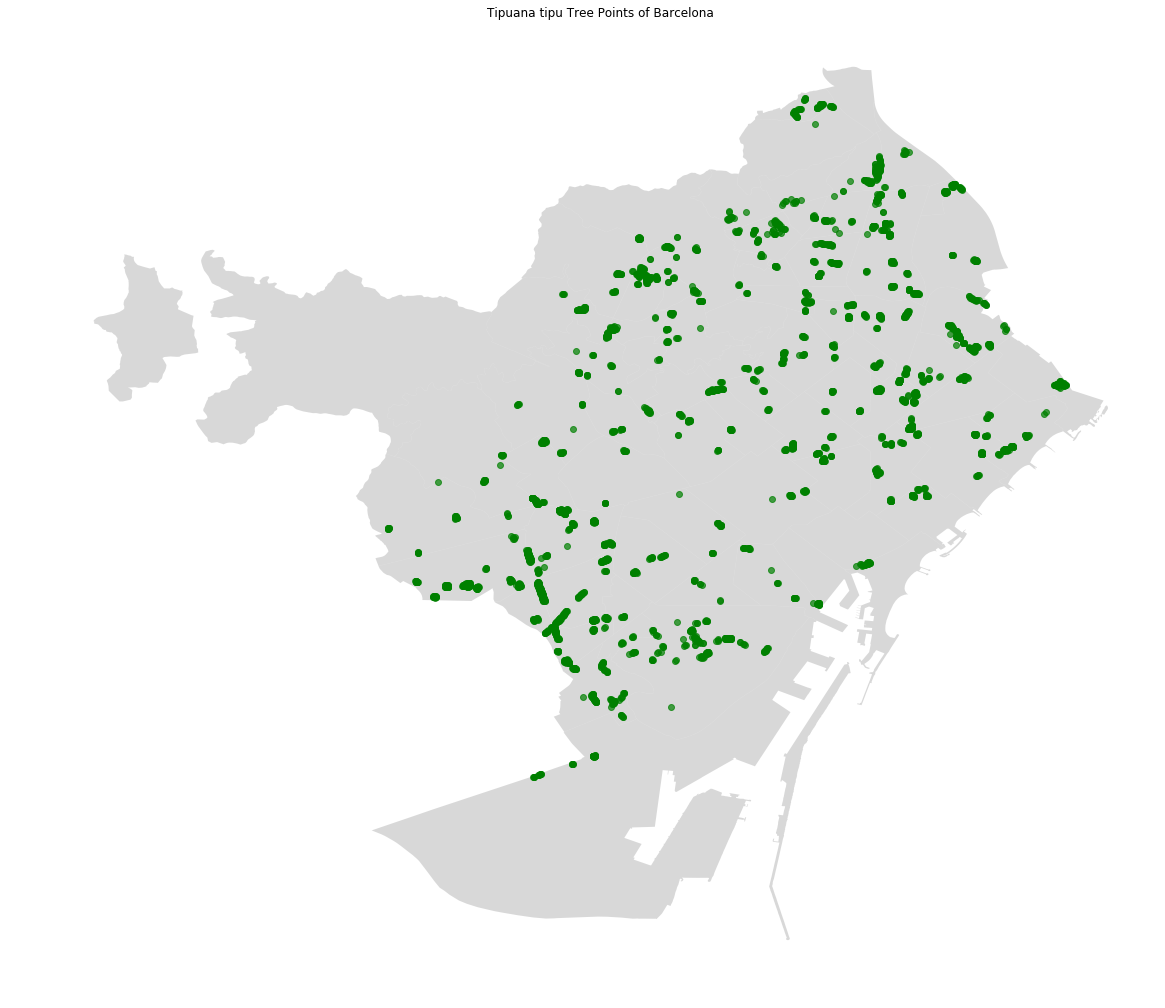

In [11]:
Tipuana_Tipu = TypeofTree('Tipuana tipu')
Tipuana_Tipu.PlotPoints(barcelona_trees, 'Scientific_Name', 'green')

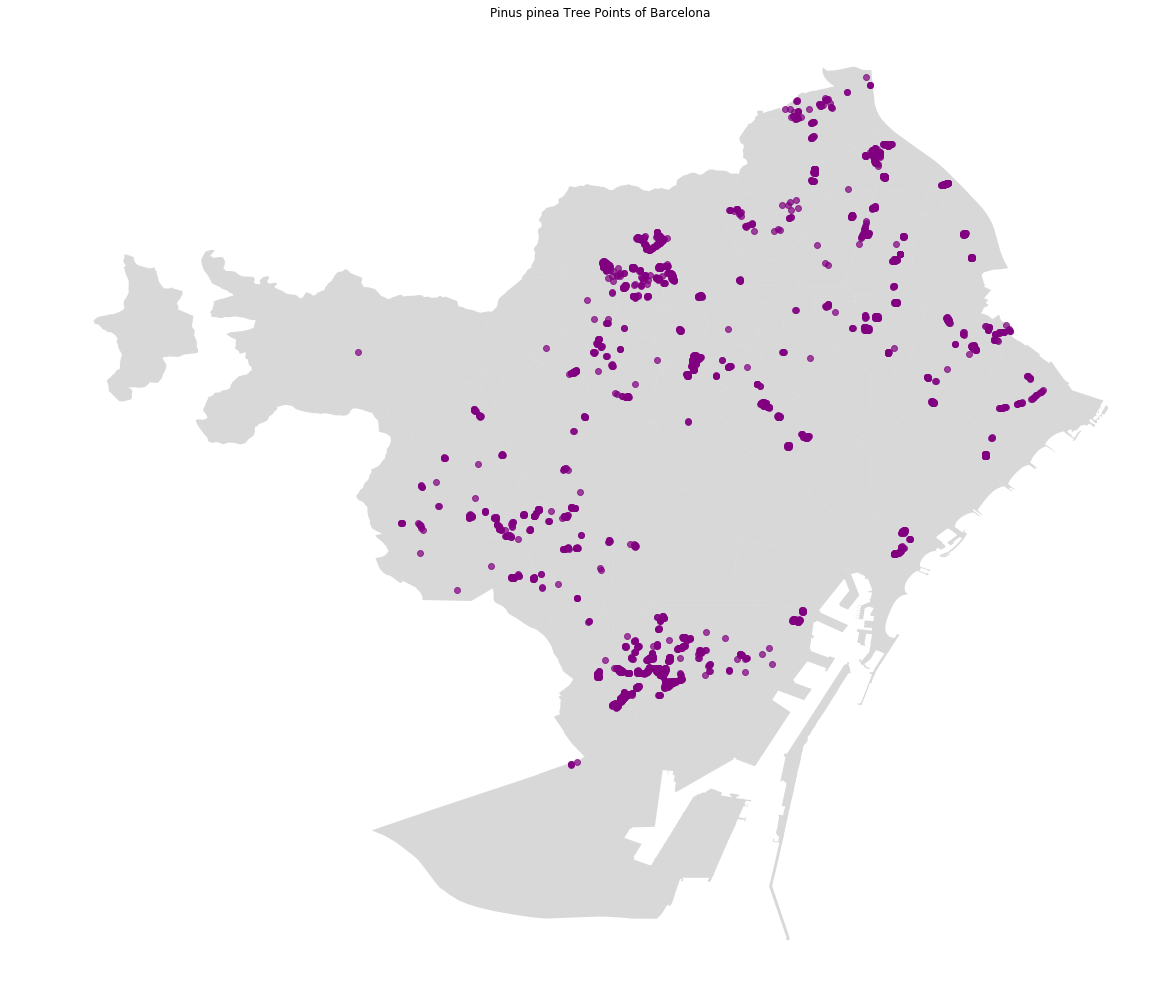

In [12]:
Pinus_Pinea = TypeofTree('Pinus pinea')
Pinus_Pinea.PlotPoints(barcelona_trees, 'Scientific_Name', 'purple')

# Part 1.3: Tree Types in Barrios

In [13]:
import geopandas as gpd
fname = '/Users/laurence/Downloads/barris.geojson'
df_barrios = gpd.read_file(fname)

Create a map with Barrio districts and their names

In [14]:
df_barrios_polygon = df_barrios.geometry
df_barrios_polygon

x_coordinates=[]
y_coordinates=[]
labels=[]

for row in df_barrios_polygon:
    x_coordinates.append(row.centroid.x)
    
for row in df_barrios_polygon:
    y_coordinates.append(row.centroid.y)
    
for row in df_barrios['NOM']:
    labels.append(row)

In [55]:
df_barrios_polygon.head()

0    POLYGON ((2.164713785844913 41.38593019761458,...
1    POLYGON ((2.177014188463238 41.38524835622319,...
2    POLYGON ((2.19622882438499 41.38745422089325, ...
3    POLYGON ((2.18345134700301 41.39061196901871, ...
4    POLYGON ((2.183527257213311 41.39226838581786,...
Name: geometry, dtype: object

Text(0.5, 1.0, 'Barrios of Barcelona')

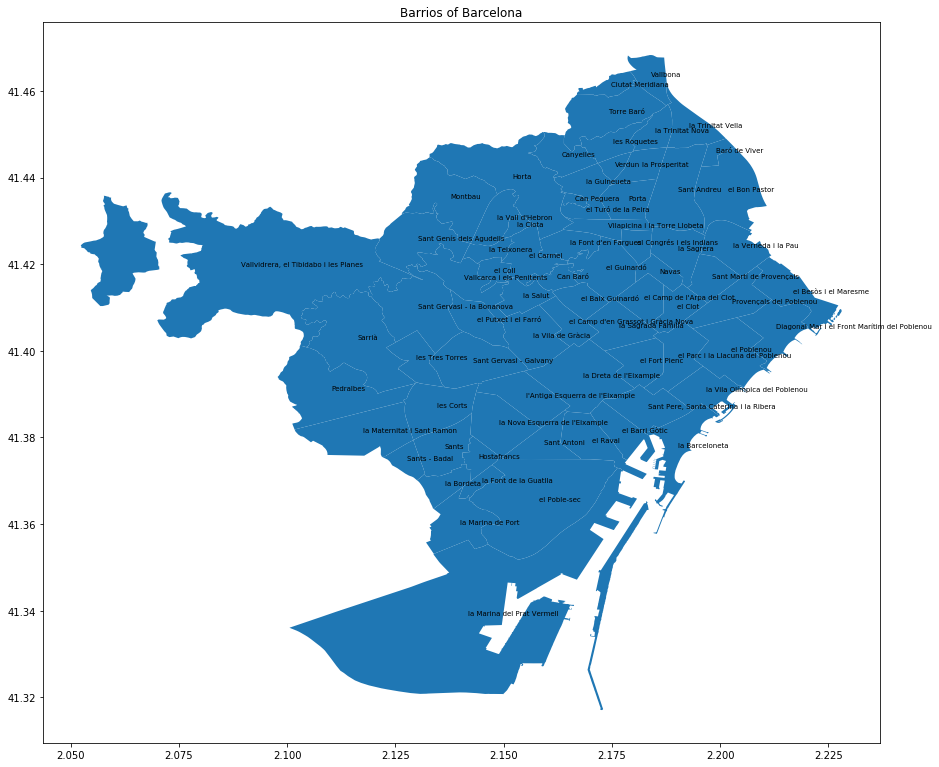

In [15]:
base=df_barrios.plot(figsize = (15,15))
texts=[]

for x, y, name in zip(x_coordinates, y_coordinates, labels):
    texts.append(plt.text(x, y, name, fontsize = 7))

base.set_title("Barrios of Barcelona")

All Tree Types plotted onto Barcelona Map (with Barrios)

In [16]:
#Step 1: find the OTHER POINTS

#make points for all other --> make a copy of the dataframe and the make that barcelona_trees_others

index_to_drop = barcelona_trees[barcelona_trees['Scientific_Name'].str.match('Tipuana tipu') | 
                               barcelona_trees['Scientific_Name'].str.match('Pinus pinea') | barcelona_trees['Scientific_Name'].str.match('Platanus x hispanica')
                               | barcelona_trees['Scientific_Name'].str.match('Cupressus sempervirens')
                               | barcelona_trees['Scientific_Name'].str.match('Pinus halepensis')].index
barcelona_trees_other = barcelona_trees.drop(index_to_drop)

In [17]:
class TypeofTree:
    
    def __init__(self, treetype):
        self.treetype = treetype
        
    def GetGeoCoordinates(self, DataFrame, Category):
        tree_type_points= DataFrame[DataFrame[Category].str.match(self.treetype)]
        coordinates = tree_type_points[["LONG", "LAT"]].apply(lambda row: Point(row["LONG"], row["LAT"]), axis =1)
        geocoordinates=gpd.GeoDataFrame({"geometry":coordinates})
        return geocoordinates
    
    def PlotPoints(self, DataFrame, Category, Color):
        tree_type_points= DataFrame[DataFrame[Category].str.match(self.treetype)]
        coordinates = tree_type_points[["LONG", "LAT"]].apply(lambda row: Point(row["LONG"], row["LAT"]), axis =1)
        geocoordinates=gpd.GeoDataFrame({"geometry":coordinates})
        street_map = gpd.read_file('/Users/laurence/Downloads/barris.geojson')
        fig,ax = plt.subplots(1, figsize = (20,20))
        base = street_map.plot(ax=ax, color='gray', alpha=0.3)
        new_map = geocoordinates.plot(ax=base, color=Color,alpha=0.7)
        _ = ax.axis("off")
        ax.set_title(f"{self.treetype} Tree Points of Barcelona")
        return new_map

Text(0.5, 1.0, 'Tree Points of Barcelona')

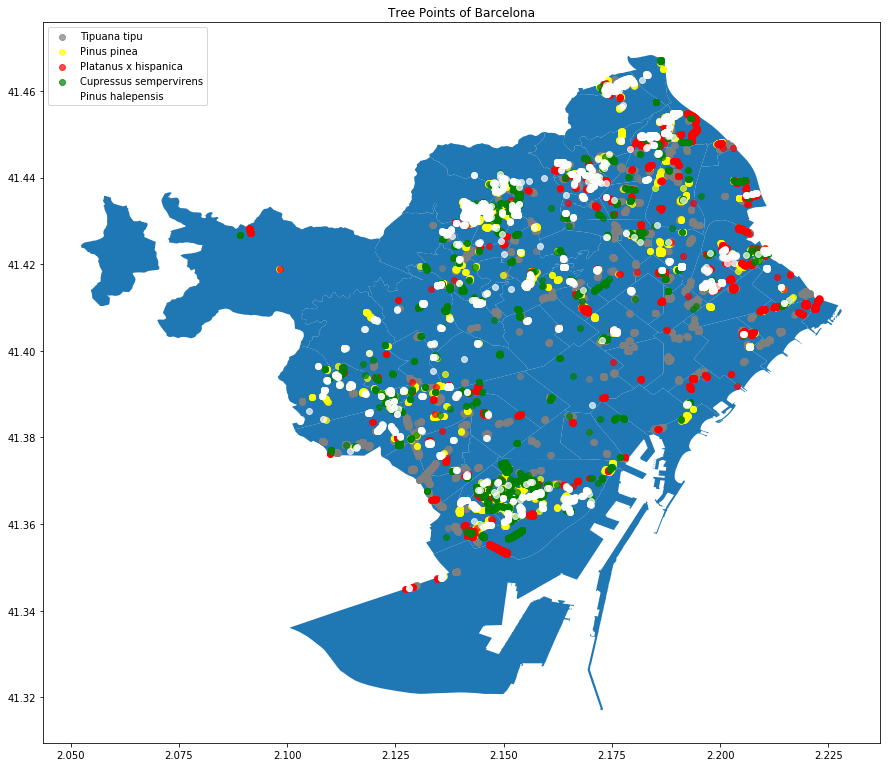

In [18]:
#Plotting ALL on same map (cannot use the PlotPoints method before, need to do it manually):

Tipuana_tipu = TypeofTree('Tipuana tipu')
Pinus_pinea = TypeofTree('Pinus pinea')
Platanus_x_hispanica = TypeofTree('Platanus x hispanica')
Cupressus_sempervirens = TypeofTree('Cupressus sempervirens')
Pinus_halepensis = TypeofTree('Pinus halepensis')

Tipuana_tipu=Tipuana_tipu.GetGeoCoordinates(barcelona_trees, 'Scientific_Name')
Pinus_pinea = Pinus_pinea.GetGeoCoordinates(barcelona_trees, 'Scientific_Name')
Platanus_x_hispanica = Platanus_x_hispanica.GetGeoCoordinates(barcelona_trees,'Scientific_Name')
Cupressus_sempervirens = Cupressus_sempervirens.GetGeoCoordinates(barcelona_trees, 'Scientific_Name')
Pinus_halepensis = Pinus_halepensis.GetGeoCoordinates(barcelona_trees, 'Scientific_Name')

street_map = gpd.read_file('/Users/laurence/Downloads/barris.geojson')
base = street_map.plot(figsize=(15,15))
Tipuana_tipu.plot(ax=base, color='gray',alpha=0.7, label = 'Tipuana tipu')
Pinus_pinea.plot(ax=base, color='yellow',alpha=0.7, label = 'Pinus pinea')
Platanus_x_hispanica.plot(ax=base, color='red',alpha=0.7, label = 'Platanus x hispanica')
Cupressus_sempervirens.plot(ax=base, color='green',alpha=0.7, label = 'Cupressus sempervirens')
Pinus_halepensis.plot(ax=base, color='white',alpha=0.7, label = 'Pinus halepensis')
plt.legend(loc=2)
base.set_title("Tree Points of Barcelona", loc='center')

Barrios with most trees

In [19]:
df_barrios
df_barrios_polygon = df_barrios.geometry

#All Points
tree_points_all = barcelona_trees[["LONG", "LAT"]].apply(lambda row:
            Point(row["LONG"], row["LAT"]), axis =1)
geo_tree_points_all = gpd.GeoDataFrame({"geometry": tree_points_all})

Points = geo_tree_points_all['geometry']

Total_Count=[]

for poly in df_barrios_polygon:
    count=0
    for point in Points:
        if point.within(poly):
            count=count+1
    Total_Count.append(count)

In [20]:
df_barrios['Trees_per_district'] = Total_Count
df_barrios[[ 'NOM', 'Trees_per_district']].sort_values('Trees_per_district', ascending=False).head()

NOM  Trees_per_district
10         el Poble-sec                4717
25     la Vall d'Hebron                2322
12    la Marina de Port                1773
59  la Verneda i la Pau                1680
36            les Corts                1657

In [21]:
#Compile into list(for below operation):
Polygons_List_Indeces = []
for i in df_barrios[[ 'NOM', 'Trees_per_district']].sort_values('Trees_per_district', ascending=False).head().index:
    Polygons_List_Indeces.append(i)

Polygons_List_Indeces

[10, 25, 12, 59, 36]

Append Points to District in order to plot these onto a graph

In [22]:
street_map = gpd.read_file('/Users/laurence/Downloads/barris.geojson')
polygons = street_map['geometry']
Points = geo_tree_points_all['geometry']

el_Poble = []
la_Vall = []
la_Marina = []
la_Vernada = []
les_Corts = []

#list for each area:

Point_List = []
for points in Points:
    if points.within(polygons[10]):
        el_Poble.append(points)
    if points.within(polygons[25]):
        la_Vall.append(points)
    if points.within(polygons[12]):
        la_Marina.append(points)
    if points.within(polygons[59]):
        la_Vernada.append(points)
    if points.within(polygons[36]):
        les_Corts.append(points)
        

*Improvements*: How can I create new lists in iteration? I.e. not need to create empty lists manually.

Create a class definition to plot these for the different Barrios

In [23]:
#The only way is to separate the get geocoordinates function from the plotting one.

class TypeofBarrio:
    
    def __init__(self, barrio_list, barrio_name):
        self.barrio_list = barrio_list
        self.barrio_name = barrio_name
        
    def PlotMap(self, Color):
        gdf_barrio = gpd.GeoDataFrame(self.barrio_list)
        gdf_barrio = gdf_barrio.rename(columns={0: 'geometry'}).set_geometry('geometry')
        street_map = gpd.read_file('/Users/laurence/Downloads/barris.geojson')
        barrio_map = street_map[street_map['NOM']==f'{self.barrio_name}']
        barrio_map_plot = barrio_map.plot(figsize = (15,15))
        new_map=gdf_barrio.plot(ax=barrio_map_plot, color=Color,alpha=0.5, label = f'{self.barrio_name} All Trees')
        plt.legend(loc=2)
        new_map.set_title(f'Trees in {self.barrio_name}', loc='left')
        return new_map

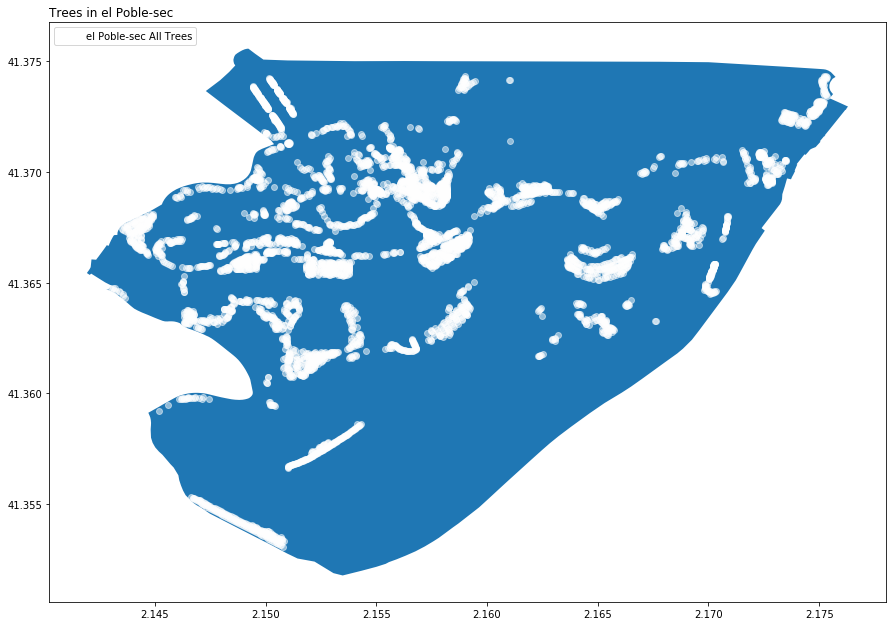

In [24]:
El_Poble = TypeofBarrio(el_Poble, 'el Poble-sec')
El_Poble.PlotMap('white')

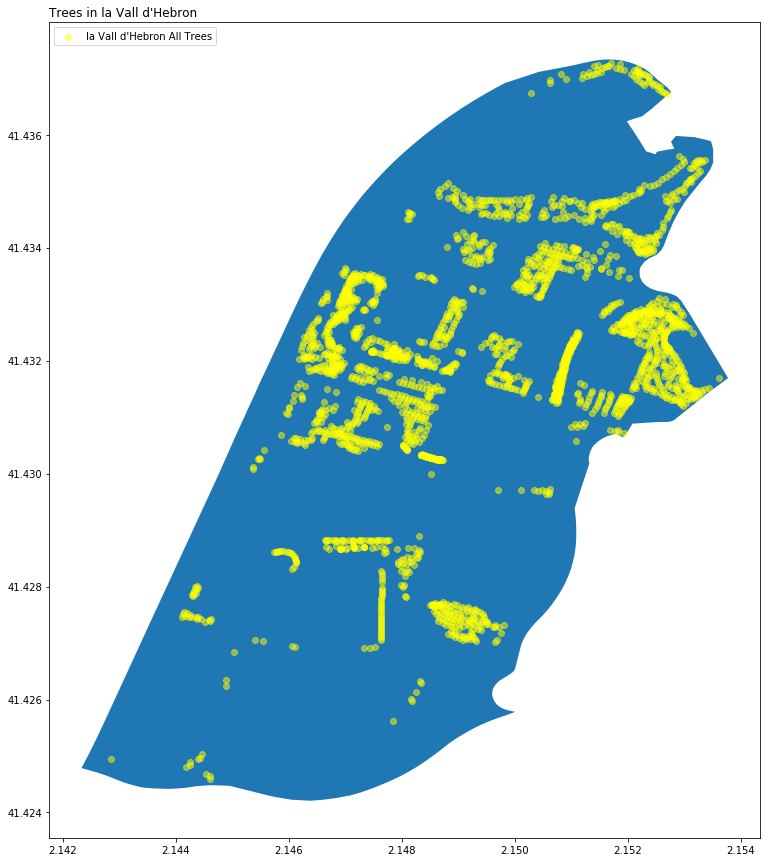

In [25]:
La_Vall = TypeofBarrio(la_Vall, "la Vall d'Hebron")
La_Vall.PlotMap('yellow')

# Part1.4: Palmera Zones

In [26]:
barcelona_trees_palm_trees = barcelona_trees[barcelona_trees['Type'].str.match('PALMERA ZONA')]
barcelona_trees_palm_trees = barcelona_trees_palm_trees[["LONG", "LAT"]].apply(lambda row:
            Point(row["LONG"], row["LAT"]), axis =1)
geo_barcelona_trees_palm_trees = gpd.GeoDataFrame({"geometry": barcelona_trees_palm_trees})

In [27]:
#Can Reutilise previous TreeType Function to generate map

class TypeofTree55:
    
    def __init__(self, treetype):
        self.treetype = treetype
    
    def PlotPoints55(self, DataFrame, Category, Color):
        tree_type_points= DataFrame[DataFrame[Category].str.match(self.treetype)]
        coordinates = tree_type_points[["LONG", "LAT"]].apply(lambda row: Point(row["LONG"], row["LAT"]), axis =1)
        geocoordinates=gpd.GeoDataFrame({"geometry":coordinates})
        street_map = gpd.read_file('/Users/laurence/Downloads/barris.geojson')
        fig,ax = plt.subplots(1, figsize = (20,20))
        base = street_map.plot(ax=ax, color='gray', alpha=0.3)
        new_map = geocoordinates.plot(ax=base, color=Color,alpha=0.7)
        _ = ax.axis("off")
        ax.set_title(f"{self.treetype} Tree Points of Barcelona")
        return new_map

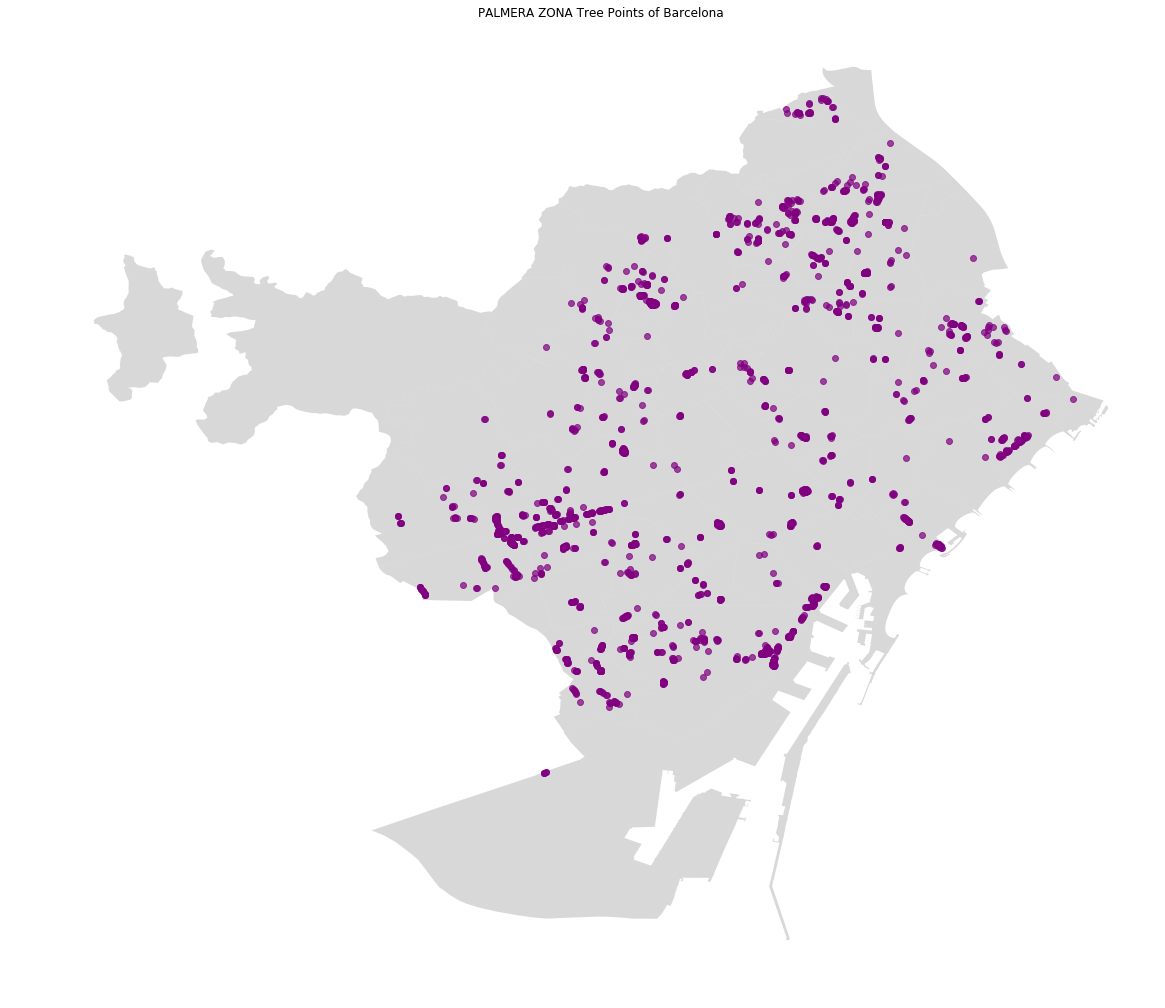

In [28]:
Palmera_Tree = TypeofTree55('PALMERA ZONA')
Palmera_Tree.PlotPoints55(barcelona_trees, 'Type', 'purple')

# Part 2.1: Create Choropleth Map for Tree Distribution

In [29]:
import folium as fm
import shapefile as shp
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import descartes
from shapely.geometry import Point, Polygon
import pandas as pd
import os

Create a function to find out proportion of trees in single barrio

In [30]:
def barrio_proportion(Tree_Points, Barrio_Polygon):
    proportion = 0
    result= []
    for point in Tree_Points:
        if point.within(Barrio_Polygon):
            result.append(point)
    proportion = len(result)/46925*100
    return proportion

Iterate this function over all Barrio polygons

In [31]:
polygons = street_map['geometry']
Points = geo_tree_points_all['geometry']


barrio_tree_percentage=[]
for i in polygons:
    barrio_tree_percentage.append(barrio_proportion(Points, i))

Put this into a csv file in order to prepare for our choropleth map

In [32]:
df_proportion = pd.DataFrame()
df_proportion['Barrios'] = street_map['NOM']
df_proportion['Tree_Percentage(%)'] = barrio_tree_percentage
df_proportion.to_csv(r'/users/laurence/downloads/Barrio_Trees_Percentage.csv')
df_proportion_csv = pd.read_csv('/users/laurence/downloads/Barrio_Trees_Percentage.csv')

Initialize the Choropleth Map

In [33]:
m = fm.Map(location = [41.438986, 2.165807], zoom_starts=5) #random location in Barcelona
#add colour to the chloropleth:
m.choropleth(
geo_data=street_map,
data=df_proportion_csv,
columns=['Barrios', 'Tree_Percentage(%)'],
key_on='feature.properties.NOM',
fill_color='YlGnBu',
fill_opacity=0.4,
line_opacity=0.9,
legend_name='Tree Percentage Rate (%)'
)
fm.LayerControl().add_to(m)

m.save('BCN_Choropleth.html')
#file:///Users/laurence/Trees%20Project%20Barcelona/BCN_Choropleth.html
m

/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


# Part 3.1 Bicycle Lanes and Trees

In [34]:
import shapefile as shp
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import descartes
from shapely.geometry import Point, Polygon, LineString
from pandas import DataFrame

from shapely.geometry import LineString
from shapely.ops import transform
from functools import partial
import pyproj

In [35]:
bicycle_lanes = gpd.read_file('/Users/laurence/Downloads/BICI.geojson')
bicycle_lanes.head()

CODI_CAPA CODI_SUBCAPA        ID                        TOOLTIP  \
0      K023          K06  GL308269       Carril Bici Av. Diagonal   
1      K023          K06  GL308270    Carril Bici Teodor Llorente   
2      K023          K06  GL308271             Carril Bici Girona   
3      K023          K06  GL308272  Carril Bici Ciutat d'Asunción   
4      K023          K06  GL308273           Carril Bici Muntaner   

                                            geometry  
0  LINESTRING (2.183660777265811 41.4026253091383...  
1  LINESTRING (2.176003955733384 41.4182201572574...  
2  LINESTRING (2.164068528074588 41.4000938912283...  
3  LINESTRING (2.199372687637976 41.4450974501419...  
4  LINESTRING (2.163214259619796 41.3838726091806...

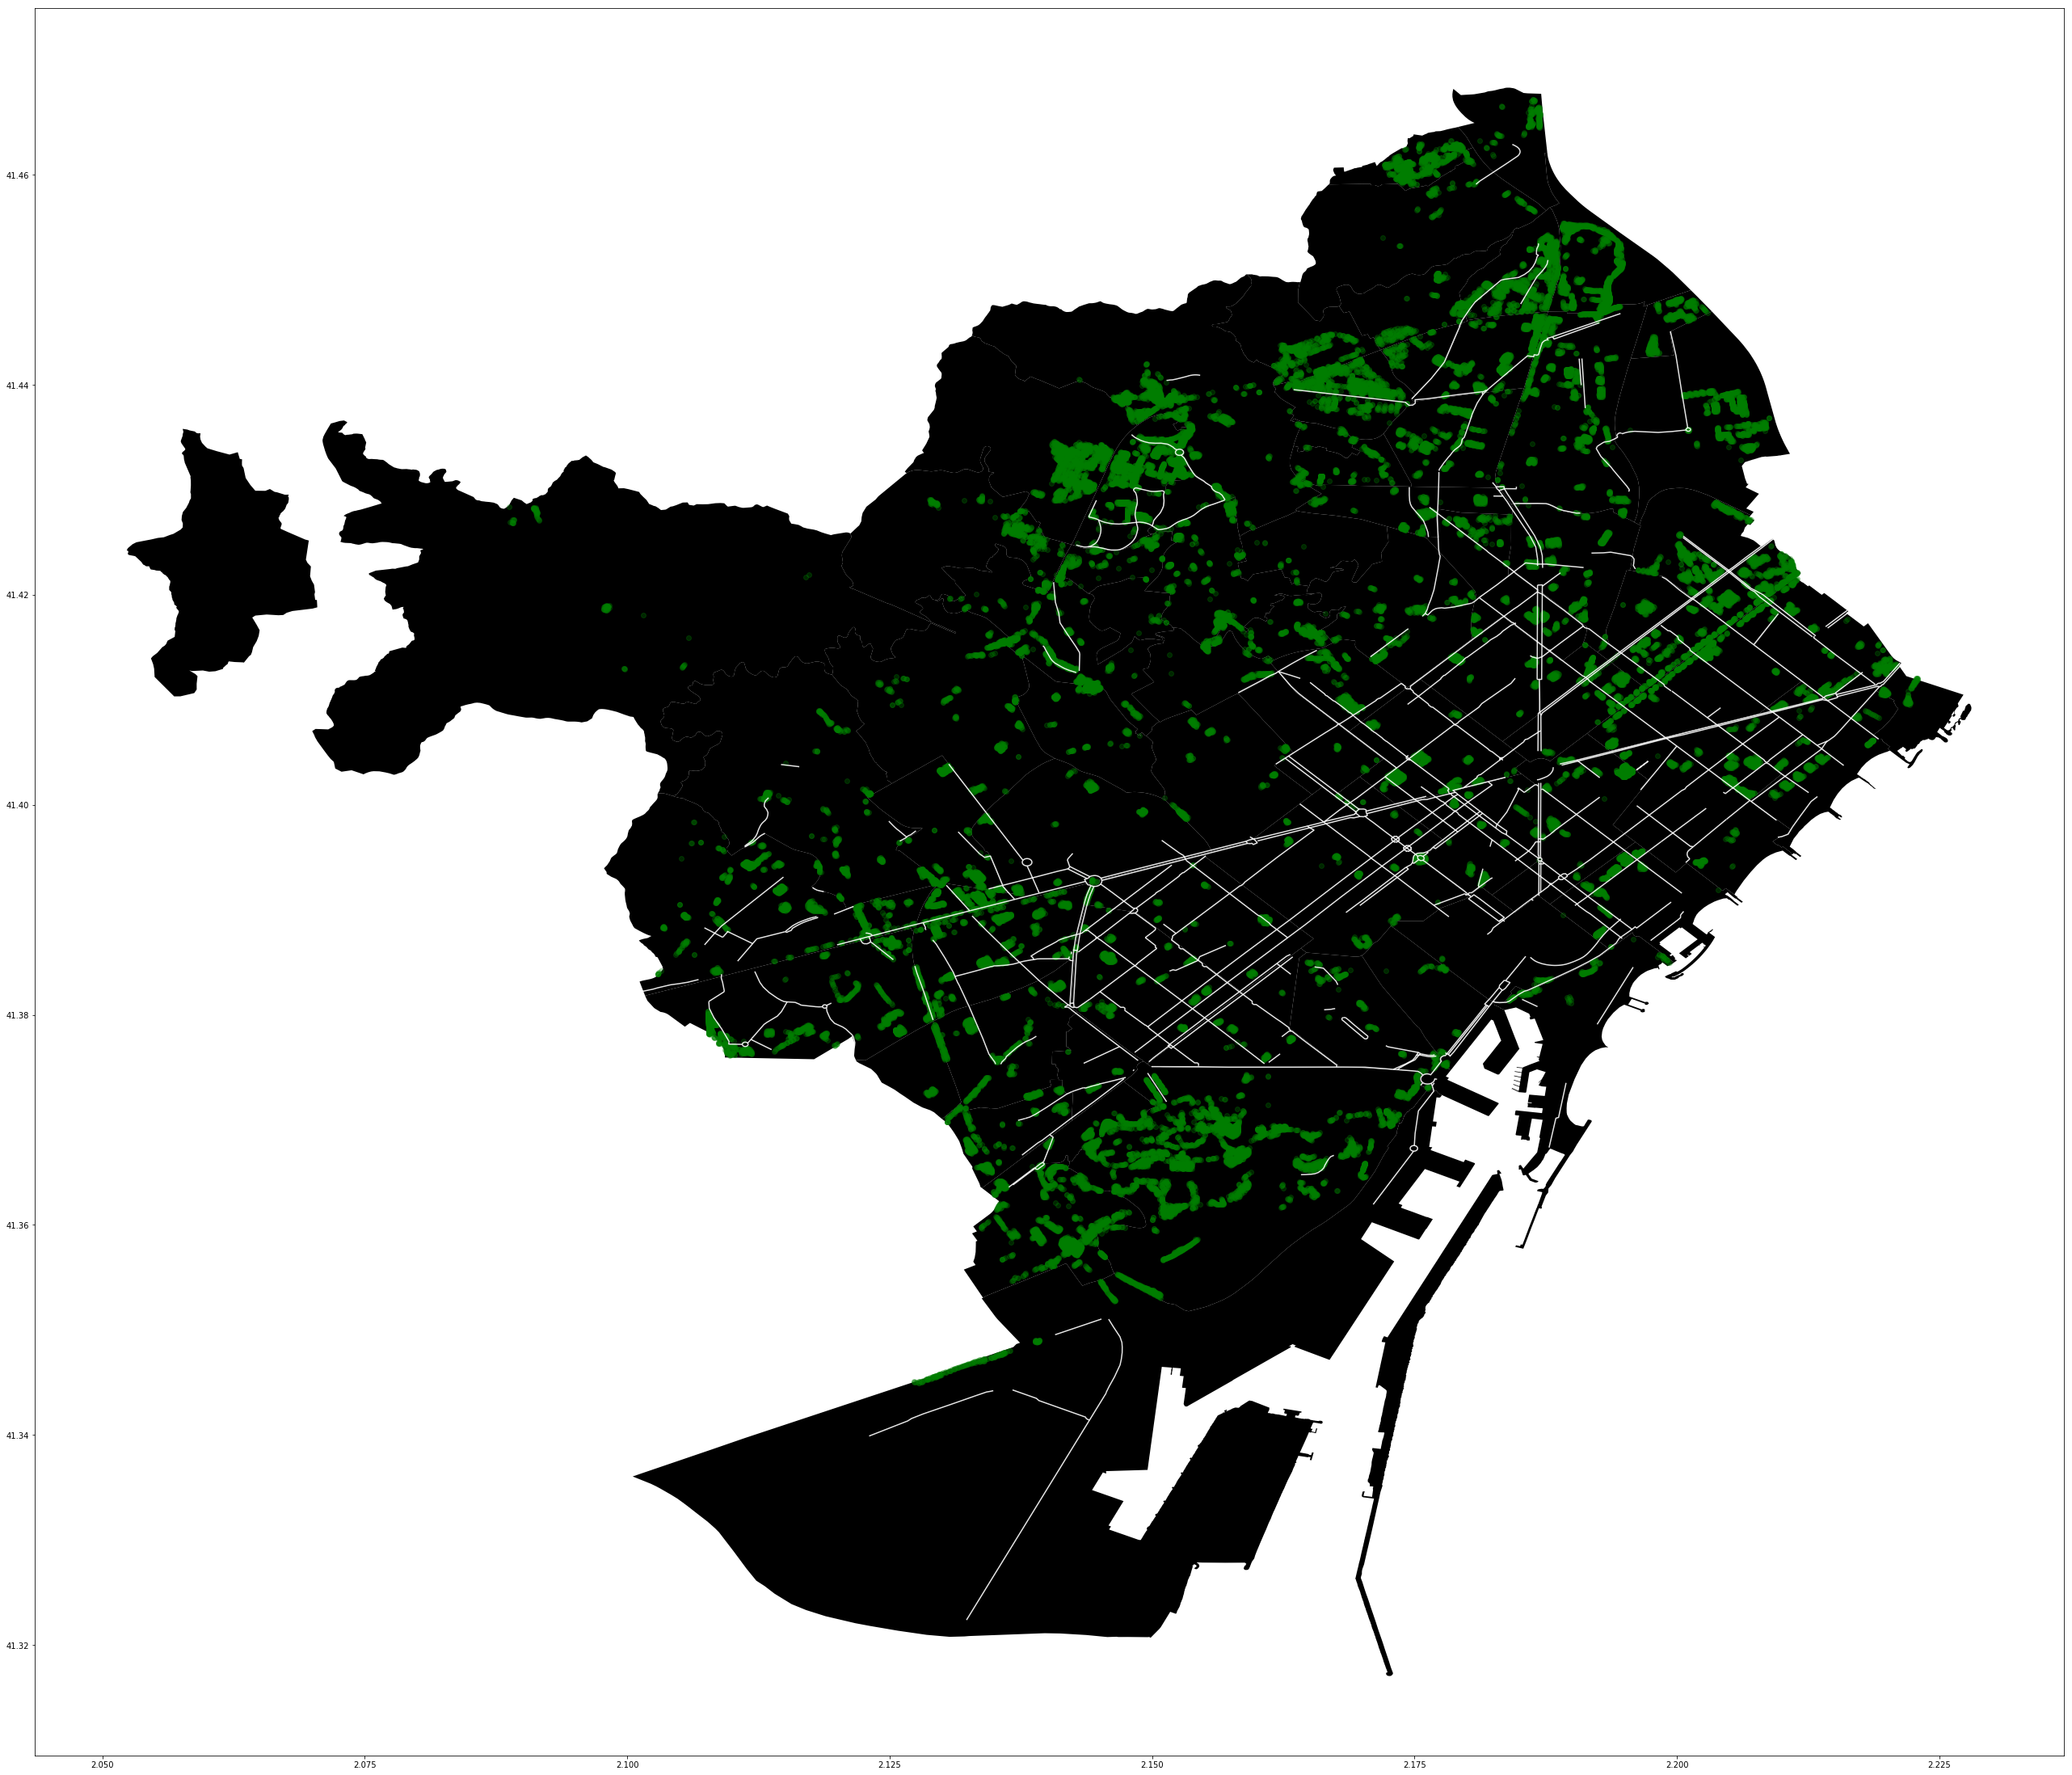

In [36]:
bcn_map = gpd.read_file('/Users/laurence/Downloads/barris.geojson')
bicycle_lanes = gpd.read_file('/Users/laurence/Downloads/BICI.geojson')
base = bcn_map.plot(figsize = (45,45), color='black')
geo_tree_points.plot(ax=base, color='green',alpha=0.3)
bicycle_lanes.plot(ax=base, color='white', alpha=0.9)

Maternitat - plot bicycles lanes and trees inside

In [37]:
street_map = gpd.read_file('/Users/laurence/Downloads/barris.geojson')
polygons = street_map['geometry']
Points = geo_tree_points['geometry']

Maternitat = []

for points in Points:
    if points.within(polygons[37]):
        Maternitat.append(points)

In [38]:
street_map = gpd.read_file('/Users/laurence/Downloads/barris.geojson')
polygons = street_map['geometry']
Bicycle_Lane_LineStrings = bicycle_lanes.geometry

Maternitat_Lanes = []

for lanes in Bicycle_Lane_LineStrings.geometry:
    if lanes.within(polygons[37]):
        Maternitat_Lanes.append(lanes)

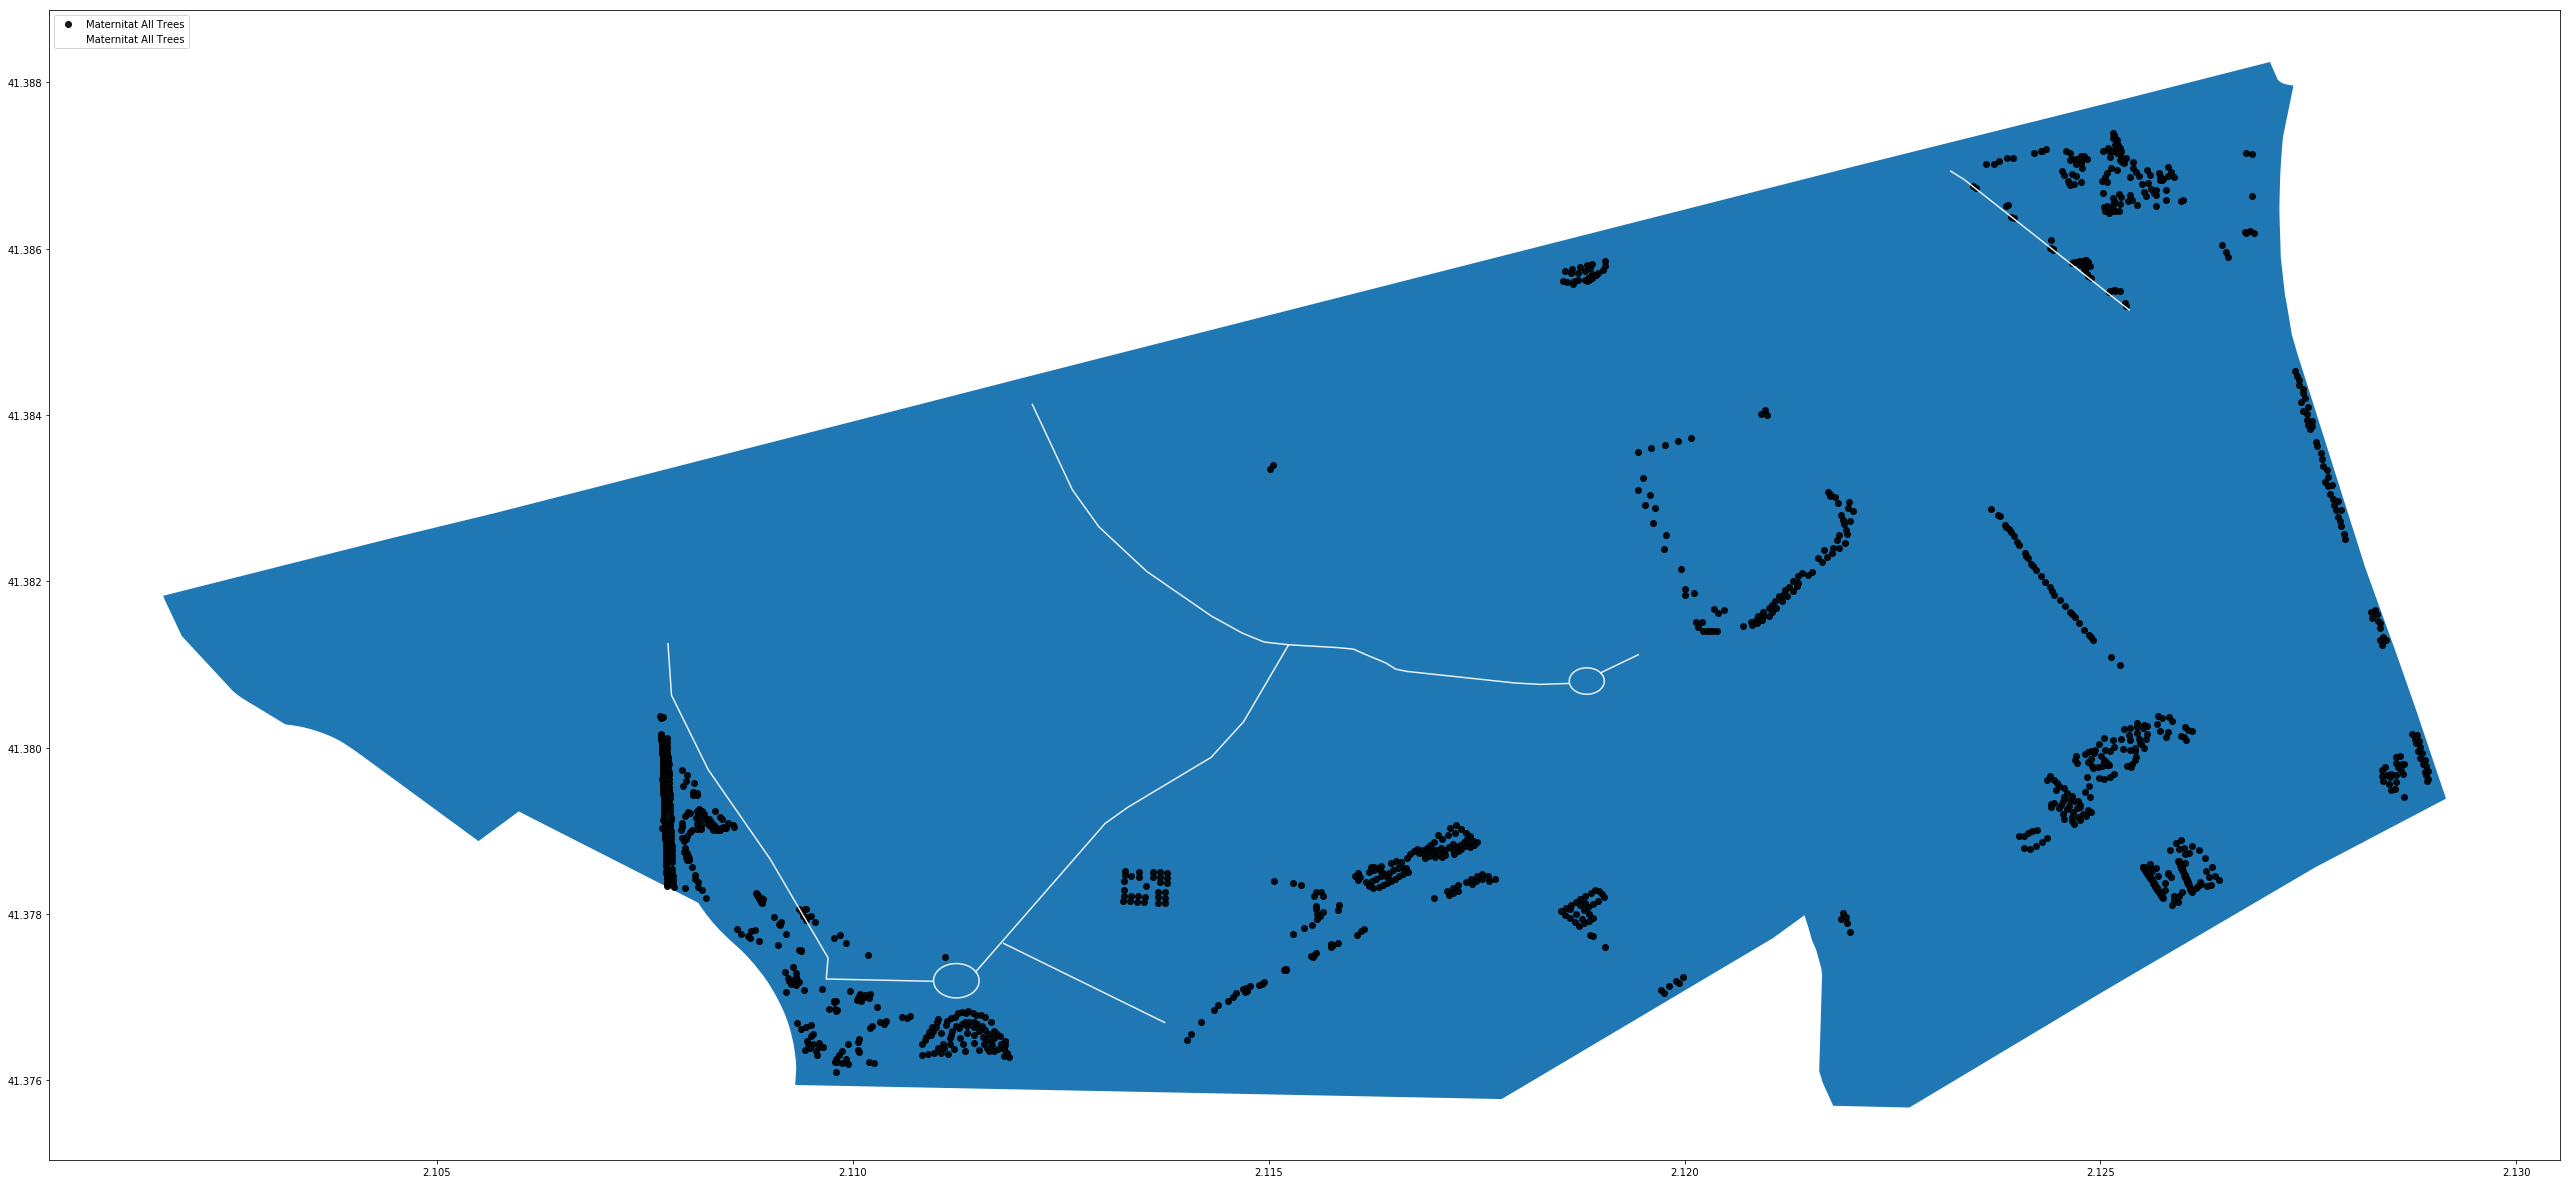

In [39]:
gdf_barrio_trees = gpd.GeoDataFrame(Maternitat)
gdf_barrio_trees = gdf_barrio_trees.rename(columns={0: 'geometry'}).set_geometry('geometry')
gdf_barrio_lanes = gpd.GeoDataFrame(Maternitat_Lanes)
gdf_barrio_lanes = gdf_barrio_lanes.rename(columns={0: 'geometry'}).set_geometry('geometry')
street_map = gpd.read_file('/Users/laurence/Downloads/barris.geojson')
barrio_map = street_map[street_map['NOM']== 'la Maternitat i Sant Ramon']
barrio_map_plot = barrio_map.plot(figsize = (45,45))
gdf_barrio_trees.plot(ax=barrio_map_plot, color='black',alpha=0.9, label = 'Maternitat All Trees')
gdf_barrio_lanes.plot(ax=barrio_map_plot, color='white',alpha=0.9, label = 'Maternitat All Trees')
plt.legend(loc=2)

List of Lanes for Maternitat

In [40]:
bicycle_lanes_Maternitat = bicycle_lanes.loc[bicycle_lanes['geometry'].isin(Maternitat_Lanes)]
bicycle_lanes_Maternitat

CODI_CAPA CODI_SUBCAPA        ID  \
47       K023          K06  GL308251   
91       K023          K06  GL308186   
135      K023          K06  GL309287   
136      K023          K06  GL309288   
195      K023          K06  GL308693   
243      K023          K06  GL308645   
246      K023          K06  GL308348   
269      K023          K06  GL308311   

                                               TOOLTIP  \
47                             Carril Bici Av. de Xile   
91         Carril Bici Bidireccional Gregorio Marañon    
135                        Carril Bici Carrer Pisuerga   
136        Carril Bici Manuel Azaña - Eix Torre Melina   
195      Carril Bici Bidireccional Connexió Joan XXIII   
243                        Carril Bici Sabino de Arana   
246  Carril Bici Rotonda connexió av Xile - av Manu...   
269  Carril Bici Rotonda Gregorio Marañon - Aristid...   

                                              geometry  
47   LINESTRING (2.115239252991493 41.3812377639062...  
91   LINESTRING (2.112154541705805 41.3841345691655...  
135  LINESTRING (2.111804691424553 41.3776509319849...  
136  LINESTRING (2.107775982272581 41.3812607625716...  
195  LINESTRING (2.119451475025373 41.3811217581294...  
243  LINESTRING (2.123192300467172 41.3869365985631...  
246  LINESTRING (2.111518194244355 41.3772005017988...  
269  LINESTRING (2.119035741134927 41.3808032172162...

Find the distance between each tree point and each bicyclce lane

Distance function

In [41]:
def average_distance(Lane_Start, Lane_End, Tree_Points):
    Distance_List = []
    project = partial(
        pyproj.transform,
        pyproj.Proj(init='EPSG:4326'),
        pyproj.Proj(init='EPSG:32633'))
    for point in Tree_Points:
        Line_Centroid = LineString([Lane_Start, Lane_End]).interpolate(0.5, normalized=True) #this gets my central point
        line1 = transform(project, LineString([Lane_Start, point]))
        line2 = transform(project, LineString([Lane_End, point]))
        line3 = transform(project, LineString([Line_Centroid, point]))
        Distance_List.append(min([line1.length, line2.length, line3.length]))
    Average_Distance = sum(Distance_List)/len(Distance_List)
    return Average_Distance

In [42]:
def median_distance(Lane_Start, Lane_End, Tree_Points):
    import statistics
    Distance_List = []
    project = partial(
        pyproj.transform,
        pyproj.Proj(init='EPSG:4326'),
        pyproj.Proj(init='EPSG:32633'))
    for point in Tree_Points:
        Line_Centroid = LineString([Lane_Start, Lane_End]).interpolate(0.5, normalized=True) #this gets my central point
        line1 = transform(project, LineString([Lane_Start, point]))
        line2 = transform(project, LineString([Lane_End, point]))
        line3 = transform(project, LineString([Line_Centroid, point]))
        Distance_List.append(min([line1.length, line2.length, line3.length]))
    Median_Distance = statistics.median(Distance_List)
    return Median_Distance

Add Start and End Point of Bicycle Lane Columns

In [43]:
start =[]
end = []
for i in Maternitat_Lanes:
    start.append(i.coords[0])
    end.append(i.coords[-1])

start_string = []
for i in start:
    start_string.append(str(i))

end_string = []
for i in end:
    end_string.append(str(i))
    
#NOTE: we are appending as strings because geodataframe can only take strings in

In [44]:
bicycle_lanes.loc[bicycle_lanes['geometry'].isin(Maternitat_Lanes), 'start'] = start_string
bicycle_lanes.loc[bicycle_lanes['geometry'].isin(Maternitat_Lanes), 'end'] = end_string
bicycle_lanes_Maternitat=bicycle_lanes.loc[bicycle_lanes['geometry'].isin(Maternitat_Lanes)]
bicycle_lanes_Maternitat

CODI_CAPA CODI_SUBCAPA        ID  \
47       K023          K06  GL308251   
91       K023          K06  GL308186   
135      K023          K06  GL309287   
136      K023          K06  GL309288   
195      K023          K06  GL308693   
243      K023          K06  GL308645   
246      K023          K06  GL308348   
269      K023          K06  GL308311   

                                               TOOLTIP  \
47                             Carril Bici Av. de Xile   
91         Carril Bici Bidireccional Gregorio Marañon    
135                        Carril Bici Carrer Pisuerga   
136        Carril Bici Manuel Azaña - Eix Torre Melina   
195      Carril Bici Bidireccional Connexió Joan XXIII   
243                        Carril Bici Sabino de Arana   
246  Carril Bici Rotonda connexió av Xile - av Manu...   
269  Carril Bici Rotonda Gregorio Marañon - Aristid...   

                                              geometry  \
47   LINESTRING (2.115239252991493 41.3812377639062...   
91   LINESTRING (2.112154541705805 41.3841345691655...   
135  LINESTRING (2.111804691424553 41.3776509319849...   
136  LINESTRING (2.107775982272581 41.3812607625716...   
195  LINESTRING (2.119451475025373 41.3811217581294...   
243  LINESTRING (2.123192300467172 41.3869365985631...   
246  LINESTRING (2.111518194244355 41.3772005017988...   
269  LINESTRING (2.119035741134927 41.3808032172162...   

                                        start  \
47    (2.1152392529914925, 41.38123776390627)   
91    (2.1121545417058045, 41.38413456916554)   
135    (2.111804691424553, 41.37765093198497)   
136   (2.1077759822725812, 41.38126076257169)   
195    (2.1194514750253726, 41.3811217581294)   
243  (2.1231923004671724, 41.386936598563096)   
246  (2.1115181942443546, 41.377200501798825)   
269   (2.119035741134927, 41.380803217216204)   

                                          end  
47     (2.111470503333423, 41.37729805327458)  
91     (2.1186194661495947, 41.3807730522644)  
135    (2.113756842618438, 41.37669227173477)  
136       (2.110962603975746, 41.37719149077)  
195    (2.118985745060904, 41.38089852027842)  
243    (2.125352983771008, 41.38525765792746)  
246  (2.1115181942443546, 41.377200501798825)  
269   (2.119035741134927, 41.380803217216204)

c = Maternitat
a_47 = list(eval(bicycle_lanes_Maternitat.start[47]))
b_47 = list(eval(bicycle_lanes_Maternitat.end[47]))

a_91 = list(eval(bicycle_lanes_Maternitat.start[91]))
b_91 = list(eval(bicycle_lanes_Maternitat.end[91]))

a_135 = list(eval(bicycle_lanes_Maternitat.start[135]))
b_135 = list(eval(bicycle_lanes_Maternitat.end[135]))

a_136 = list(eval(bicycle_lanes_Maternitat.start[136]))
b_136 = list(eval(bicycle_lanes_Maternitat.end[136]))

a_195 = list(eval(bicycle_lanes_Maternitat.start[195]))
b_195 = list(eval(bicycle_lanes_Maternitat.end[195]))

a_243 = list(eval(bicycle_lanes_Maternitat.start[243]))
b_243 = list(eval(bicycle_lanes_Maternitat.end[243]))

a_246 = list(eval(bicycle_lanes_Maternitat.start[246]))
b_246 = list(eval(bicycle_lanes_Maternitat.end[246]))

a_269 = list(eval(bicycle_lanes_Maternitat.start[269]))
b_269 = list(eval(bicycle_lanes_Maternitat.end[269]))

average_distance_list = []


#average_distance_list.append(average_distance(a_47,b_47,c))
#average_distance_list.append(average_distance(a_91,b_91,c))
#average_distance_list.append(average_distance(a_135,b_135,c))
#average_distance_list.append(average_distance(a_136,b_136,c))
#average_distance_list.append(average_distance(a_195,b_195,c))
#average_distance_list.append(average_distance(a_243,b_243,c))
#average_distance_list.append(average_distance(a_246,b_246,c))
#average_distance_list.append(average_distance(a_269,b_269,c))

#Results (metres):
#[597.0285388330169,
 #620.0088264407188,
 #745.5744757292412,
 #814.6170580289656,
 #656.3325847990455,
 #917.8364675219223,
 #835.1750630070072,
 #673.1155104607069]
    
#Issue: seems to take far too long too much computing power. Need to define function better.

In [45]:
Average_Distance_List = [597.0285388330169, 620.0088264407188, 745.5744757292412, 
                         814.6170580289656, 656.3325847990455, 917.8364675219223, 835.1750630070072,
                         673.1155104607069]

bicycle_lanes.loc[bicycle_lanes['geometry'].isin(Maternitat_Lanes), 'average_tree_distance(m)'] = Average_Distance_List
bicycle_lanes_Maternitat=bicycle_lanes.loc[bicycle_lanes['geometry'].isin(Maternitat_Lanes)]
bicycle_lanes_Maternitat

CODI_CAPA CODI_SUBCAPA        ID  \
47       K023          K06  GL308251   
91       K023          K06  GL308186   
135      K023          K06  GL309287   
136      K023          K06  GL309288   
195      K023          K06  GL308693   
243      K023          K06  GL308645   
246      K023          K06  GL308348   
269      K023          K06  GL308311   

                                               TOOLTIP  \
47                             Carril Bici Av. de Xile   
91         Carril Bici Bidireccional Gregorio Marañon    
135                        Carril Bici Carrer Pisuerga   
136        Carril Bici Manuel Azaña - Eix Torre Melina   
195      Carril Bici Bidireccional Connexió Joan XXIII   
243                        Carril Bici Sabino de Arana   
246  Carril Bici Rotonda connexió av Xile - av Manu...   
269  Carril Bici Rotonda Gregorio Marañon - Aristid...   

                                              geometry  \
47   LINESTRING (2.115239252991493 41.3812377639062...   
91   LINESTRING (2.112154541705805 41.3841345691655...   
135  LINESTRING (2.111804691424553 41.3776509319849...   
136  LINESTRING (2.107775982272581 41.3812607625716...   
195  LINESTRING (2.119451475025373 41.3811217581294...   
243  LINESTRING (2.123192300467172 41.3869365985631...   
246  LINESTRING (2.111518194244355 41.3772005017988...   
269  LINESTRING (2.119035741134927 41.3808032172162...   

                                        start  \
47    (2.1152392529914925, 41.38123776390627)   
91    (2.1121545417058045, 41.38413456916554)   
135    (2.111804691424553, 41.37765093198497)   
136   (2.1077759822725812, 41.38126076257169)   
195    (2.1194514750253726, 41.3811217581294)   
243  (2.1231923004671724, 41.386936598563096)   
246  (2.1115181942443546, 41.377200501798825)   
269   (2.119035741134927, 41.380803217216204)   

                                          end  average_tree_distance(m)  
47     (2.111470503333423, 41.37729805327458)                597.028539  
91     (2.1186194661495947, 41.3807730522644)                620.008826  
135    (2.113756842618438, 41.37669227173477)                745.574476  
136       (2.110962603975746, 41.37719149077)                814.617058  
195    (2.118985745060904, 41.38089852027842)                656.332585  
243    (2.125352983771008, 41.38525765792746)                917.836468  
246  (2.1115181942443546, 41.377200501798825)                835.175063  
269   (2.119035741134927, 41.380803217216204)                673.115510

Conclusion - not so useful this part, got a bit stuck.

# Part 3.2  30_Zones and Trees

In [46]:
zones_30 = gpd.read_file('/Users/laurence/Downloads/ZONES30.geojson')
zones_30.head()

CODI_CAPA CODI_SUBCAPA       ID TOOLTIP  \
0      K027          K06  GL78053           
1      K027          K06  GL78054           
2      K027          K06  GL78055           
3      K027          K06  GL78056           
4      K027          K06  GL78057           

                                            geometry  
0  POLYGON ((2.130177094211865 41.37543076114971,...  
1  POLYGON ((2.142638743363568 41.41171450374458,...  
2  POLYGON ((2.17759607359092 41.43046474941361, ...  
3  POLYGON ((2.151512809102718 41.39749671317303,...  
4  POLYGON ((2.129385911919489 41.37979088632023,...

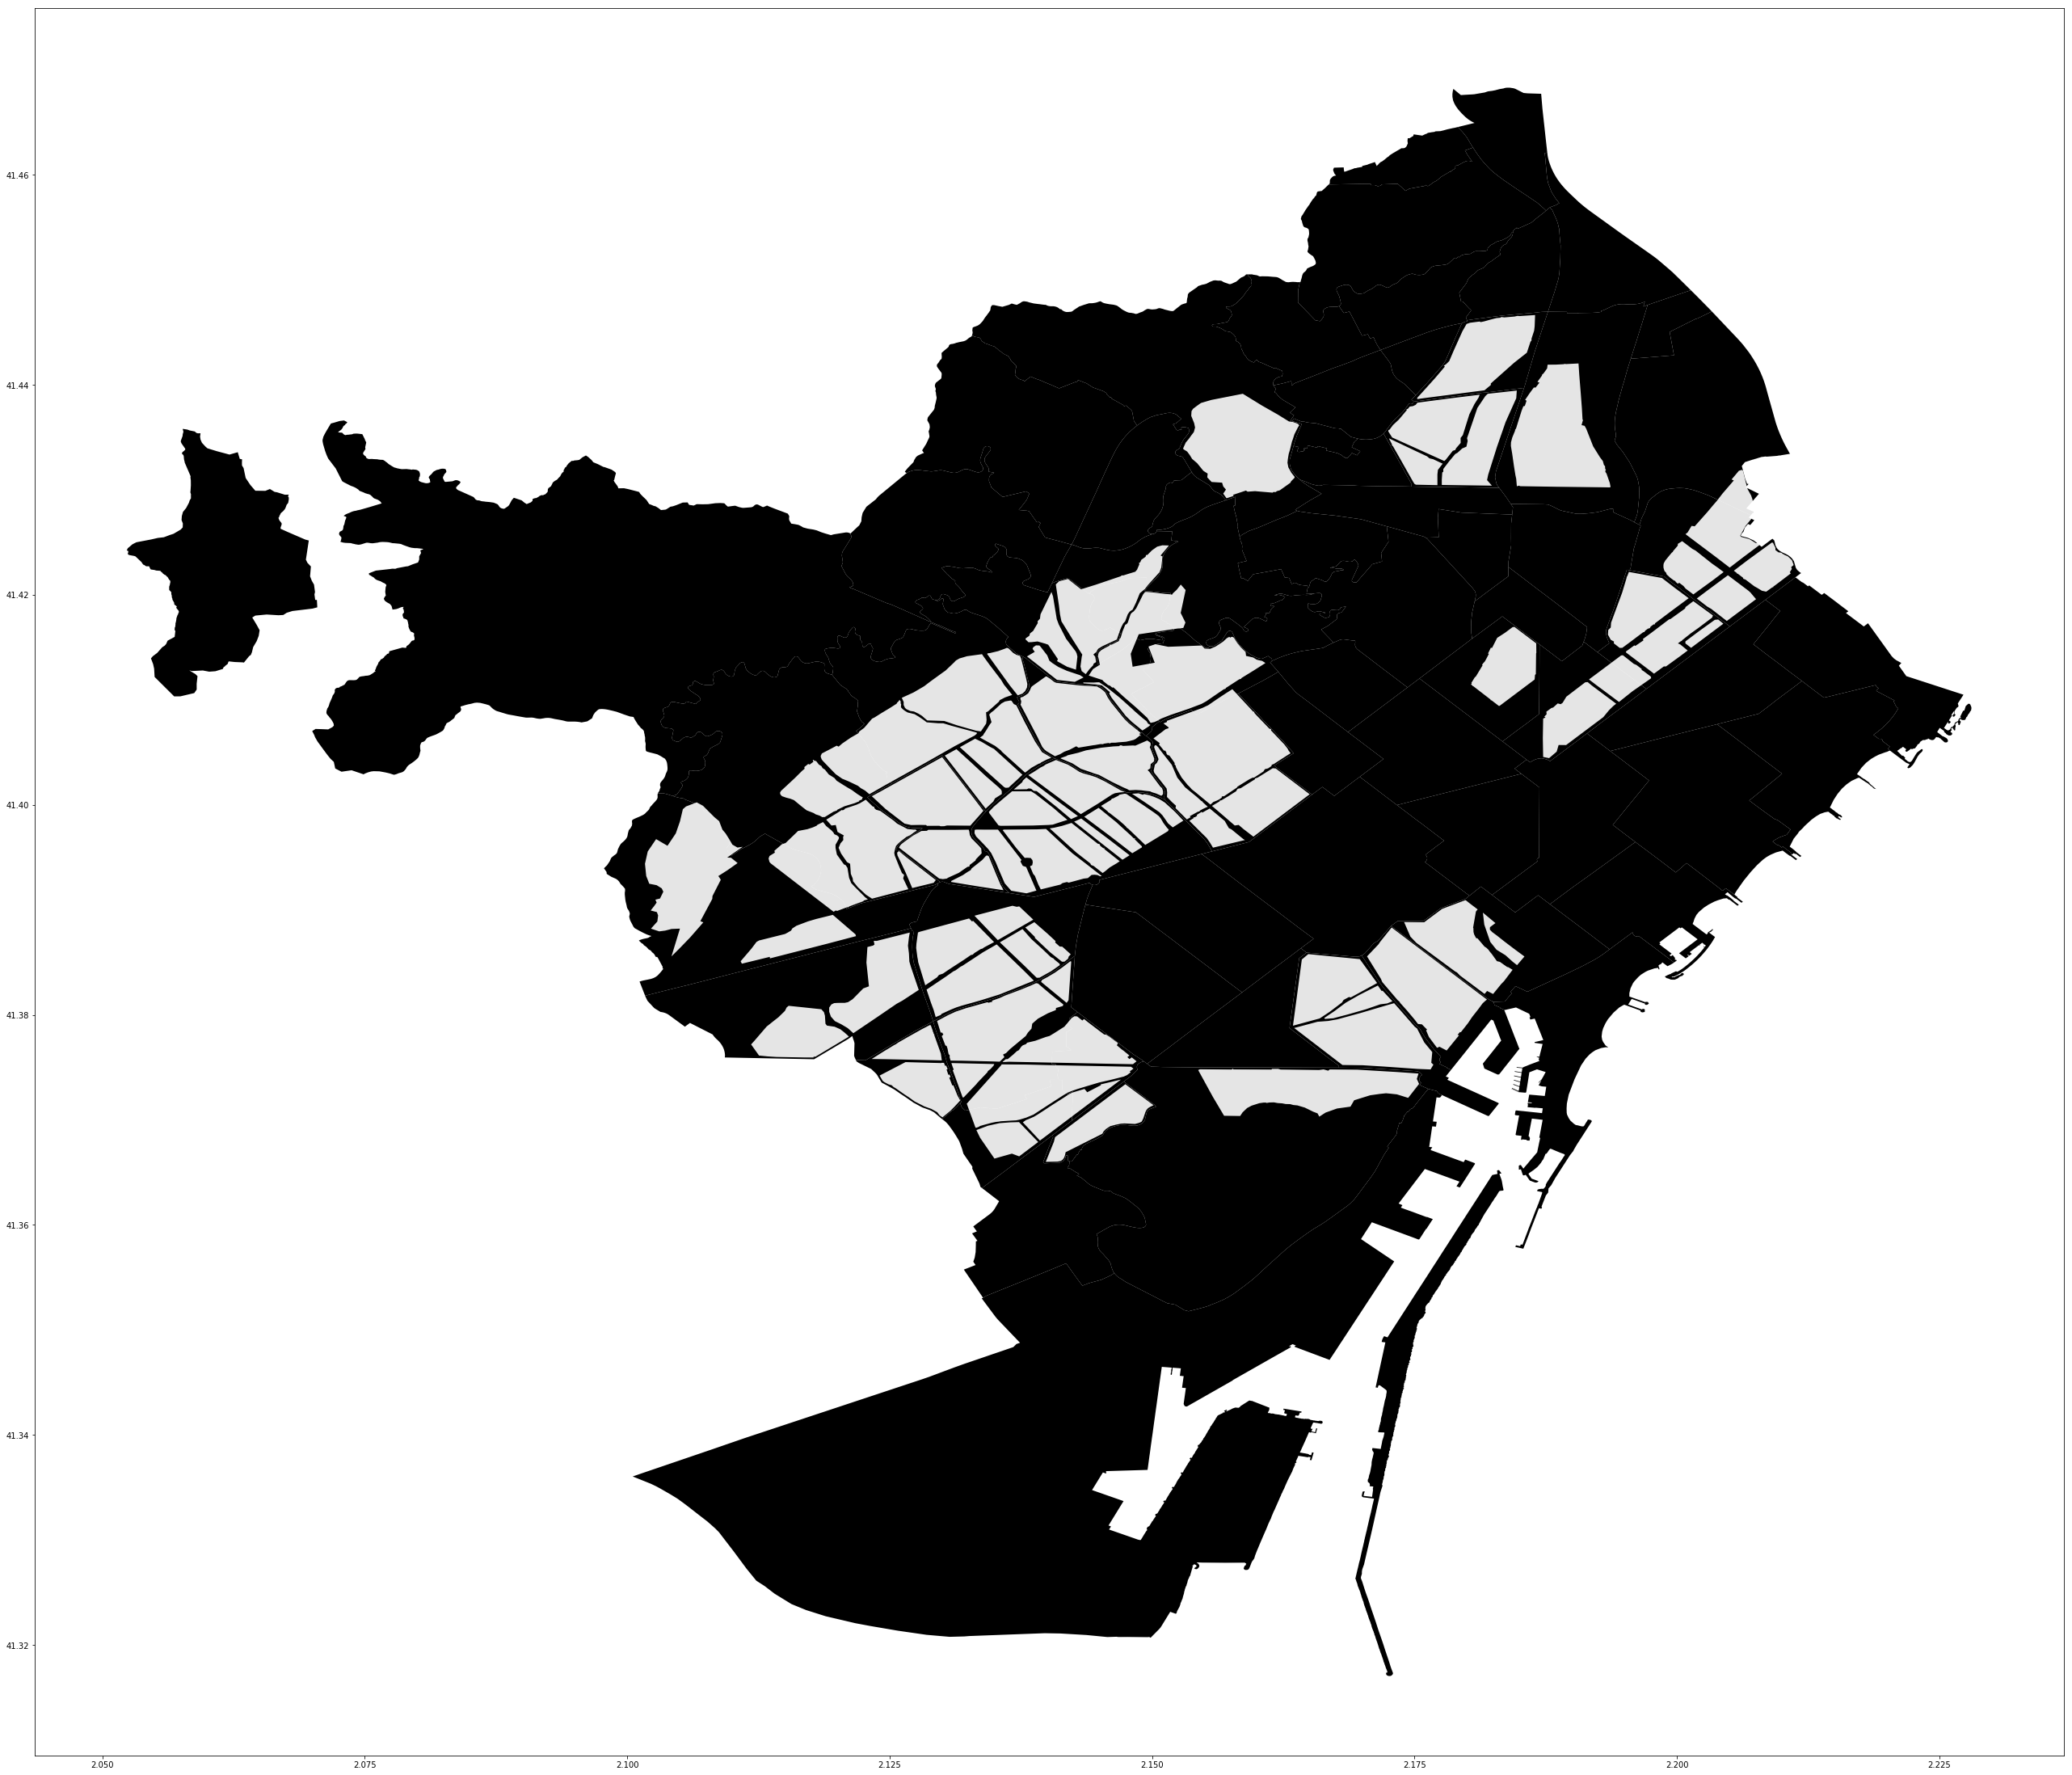

In [47]:
bcn_map = gpd.read_file('/Users/laurence/Downloads/barris.geojson')
zones_30 = gpd.read_file('/Users/laurence/Downloads/ZONES30.geojson')
base = bcn_map.plot(figsize = (45,45), color='black')
zones_30.plot(ax=base, color='white', alpha=0.9)

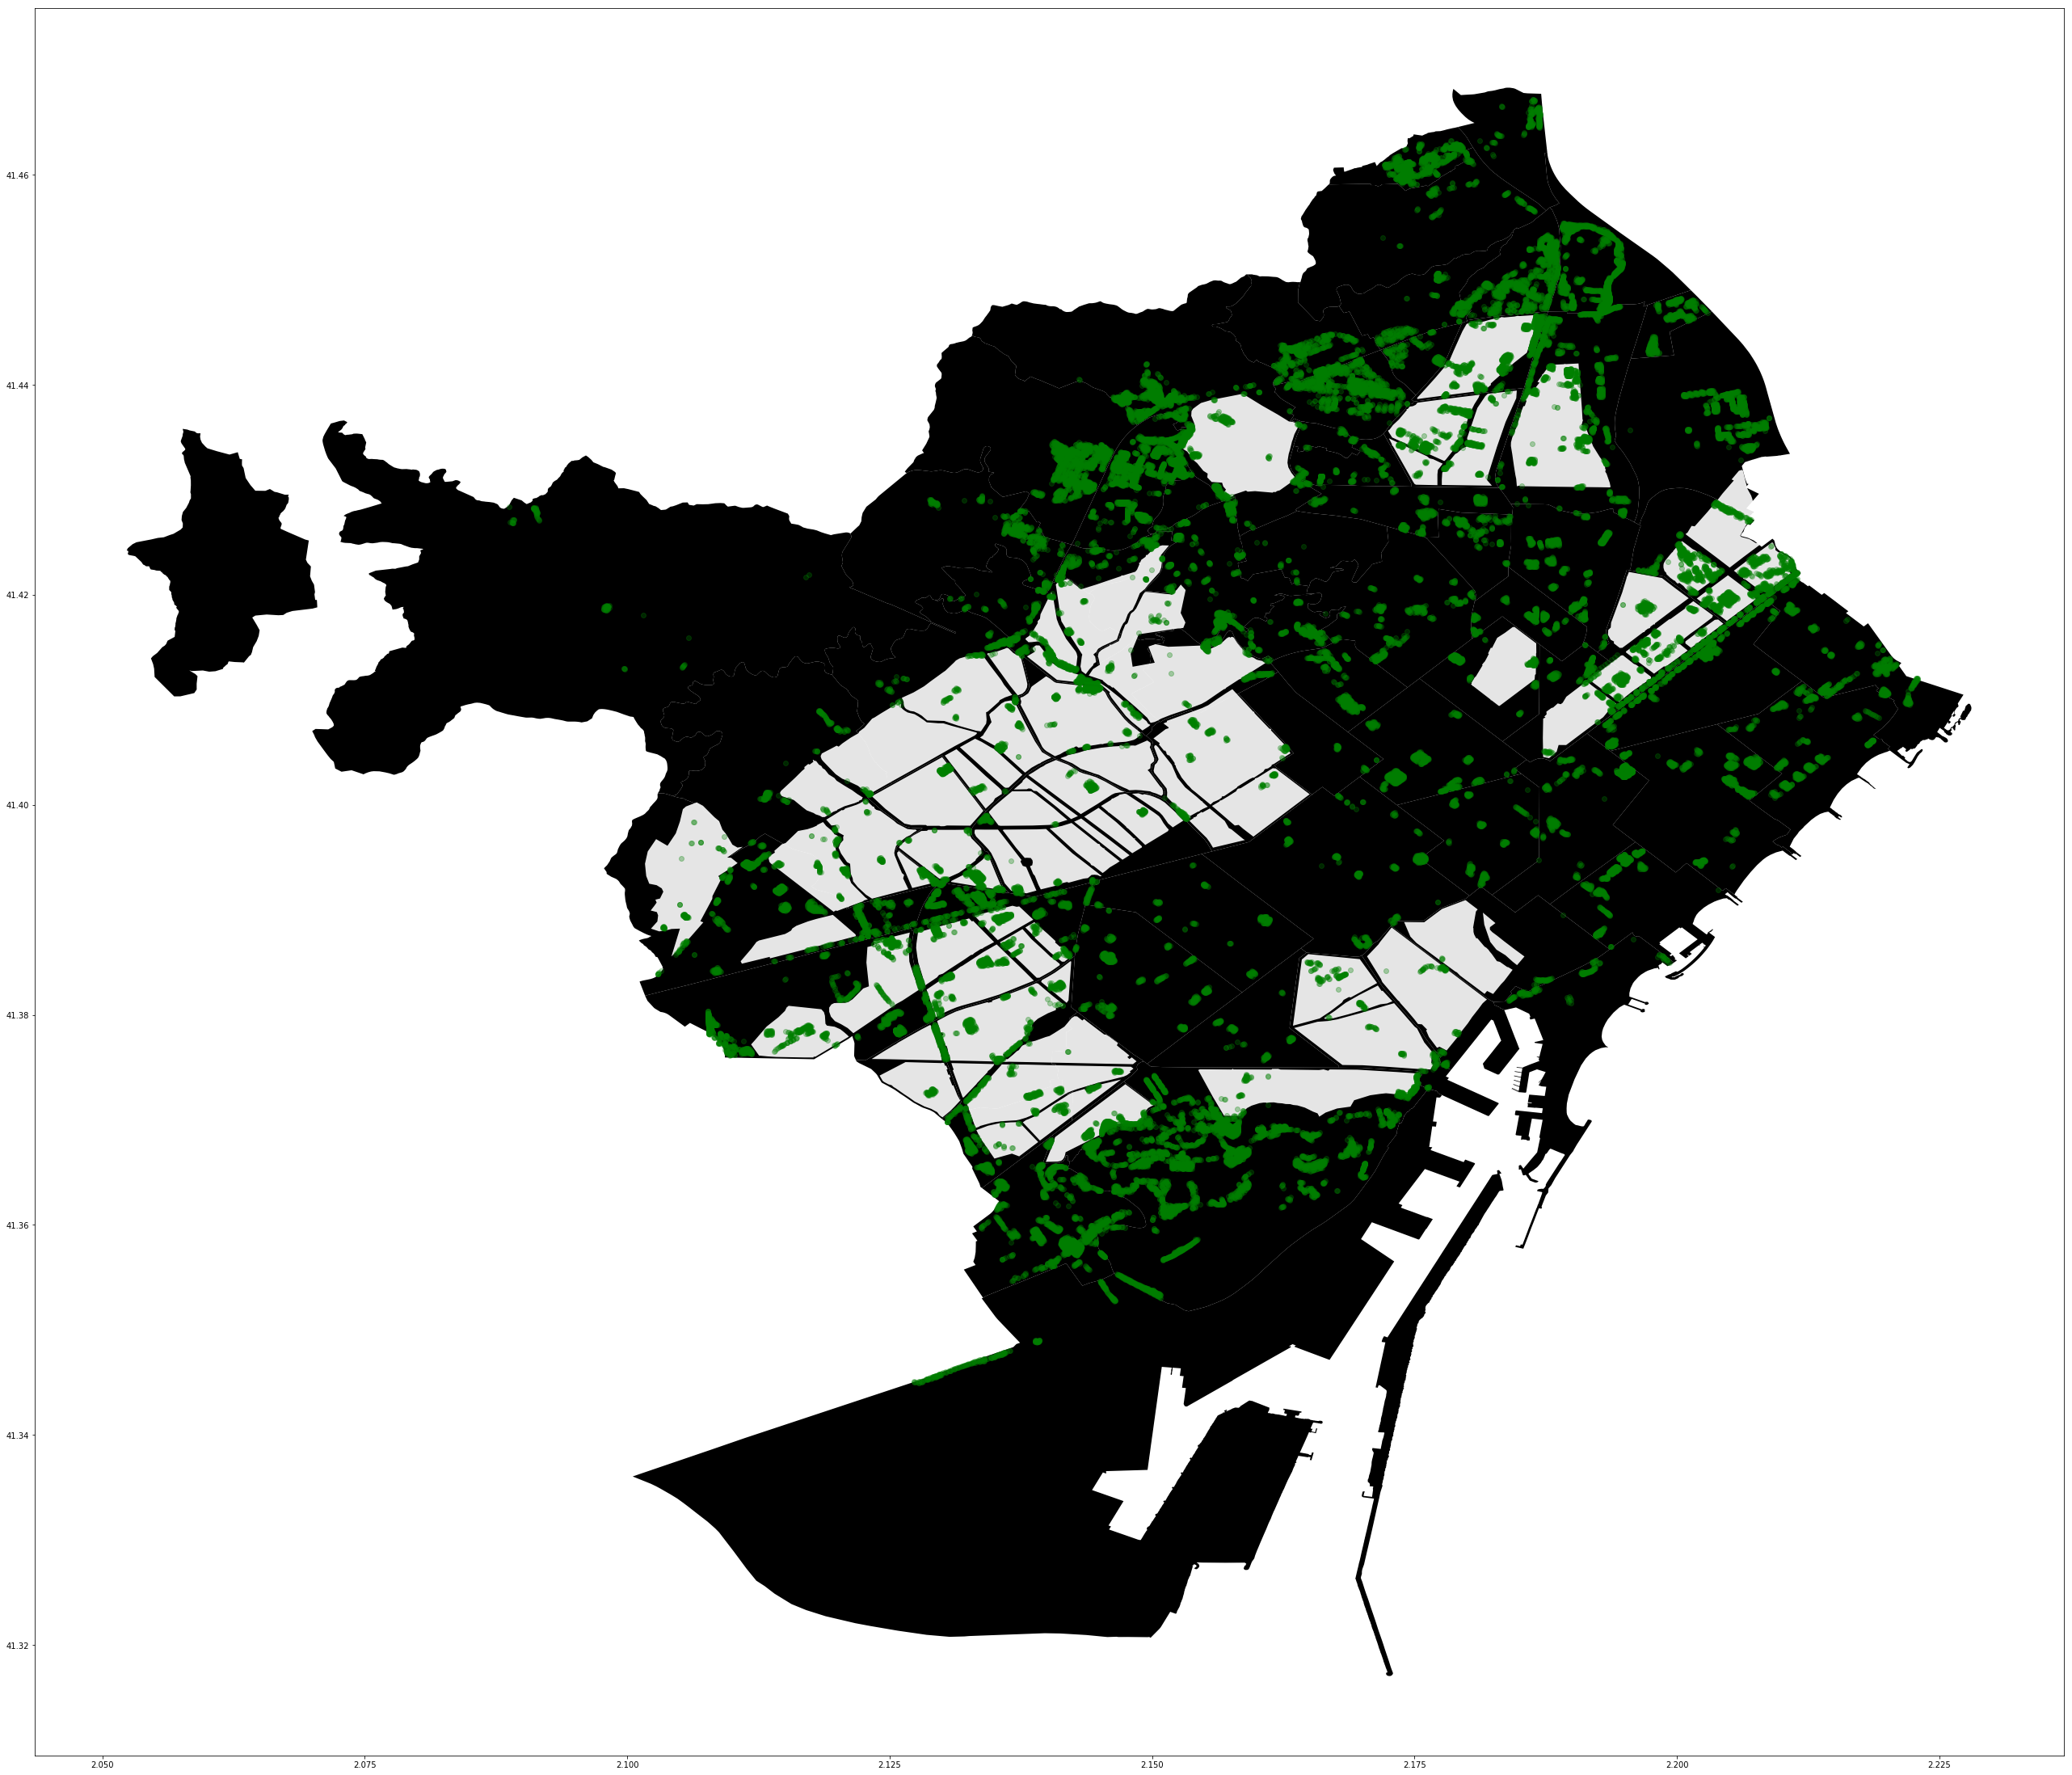

In [48]:
bcn_map = gpd.read_file('/Users/laurence/Downloads/barris.geojson')
zones_30 = gpd.read_file('/Users/laurence/Downloads/ZONES30.geojson')
base = bcn_map.plot(figsize = (45,45), color='black')
zones_30.plot(ax=base, color='white', alpha=0.9)
geo_tree_points.plot(ax=base, color='green',alpha=0.3)

In total there are 76 polygons for zone30. We can plot the trees which fall into these polygons.
(Then we can see what percentage of City Trees are in Zone 30 areas).

In [49]:
result=[]
for point in geo_tree_points_all['geometry']:
    for polygon in zones_30.geometry:
        if point.within(polygon):
            result.append(point)

In [50]:
gdf_zone30_trees = gpd.GeoDataFrame()
gdf_zone30_trees['Zone30_Trees'] = result
gdf_zone30_trees = gdf_zone30_trees.rename(columns={'Zone30_Trees': 'geometry'}).set_geometry('geometry')

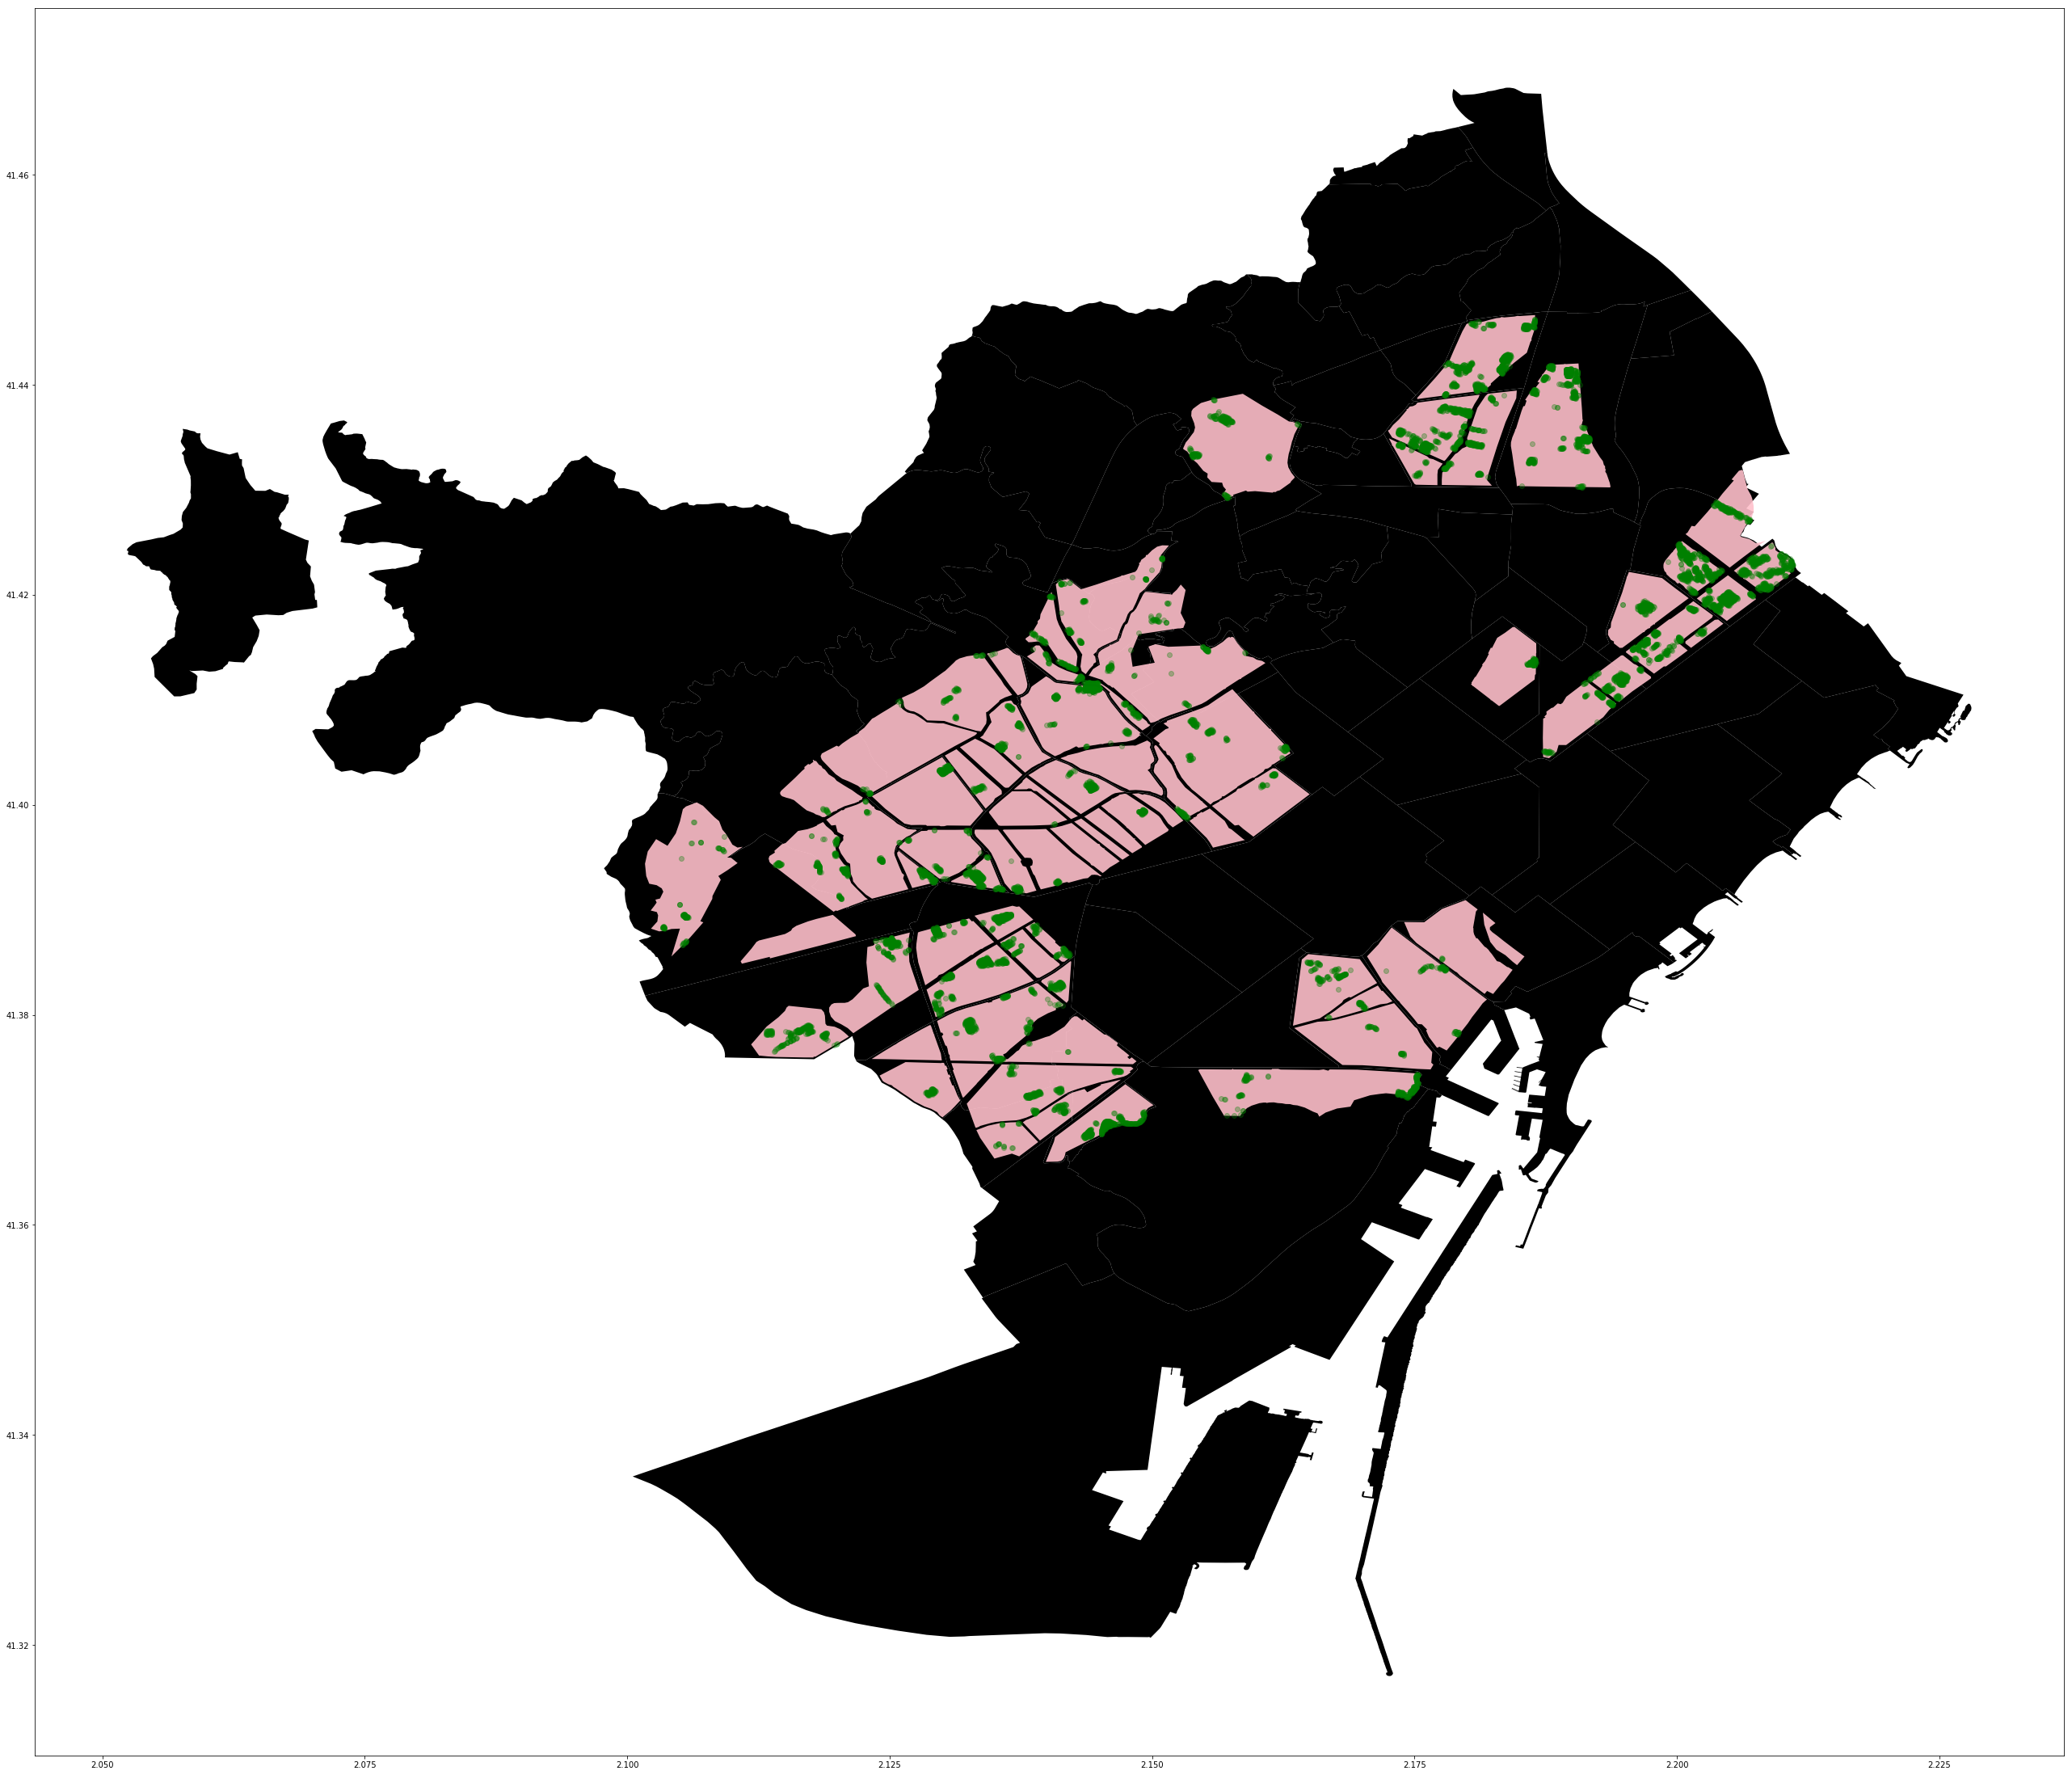

In [51]:
bcn_map = gpd.read_file('/Users/laurence/Downloads/barris.geojson')
zones_30 = gpd.read_file('/Users/laurence/Downloads/ZONES30.geojson')
base = bcn_map.plot(figsize = (45,45), color='black')
zones_30.plot(ax=base, color='pink', alpha=0.9)
gdf_zone30_trees.plot(ax=base, color='green',alpha=0.3)

Portion of trees in zone 30 zones:
Consider tree types in these areas - is there a specific trend we see here?

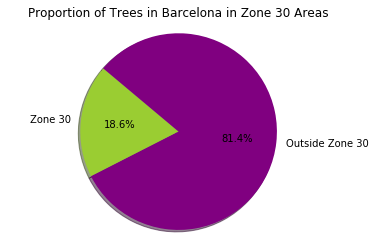

In [52]:
p=(round(len(result)/46925*100, 2))
propotion_list = [p, (100-p)]

#Pie Chart
# Data to plot
labels = 'Zone 30', 'Outside Zone 30'
sizes = propotion_list
colors = ['yellowgreen', 'purple']

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Proportion of Trees in Barcelona in Zone 30 Areas')
plt.show()

Distribution of Tree Type (Scientific Name) in Zone 30 Areas

In [53]:
barcelona_trees_zones = gpd.GeoDataFrame()
barcelona_trees_zones['Scientific_Name'] = barcelona_trees['Scientific_Name']
barcelona_trees_zones['Type'] = barcelona_trees['Type']
barcelona_trees_zones['Geometry'] = geo_tree_points
barcelona_trees_zones.head()

Scientific_Name          Type                      Geometry
0  Chamaerops humilis  PALMERA ZONA  POINT (2.1658066 41.4389859)
1      Yucca gigantea  PALMERA ZONA  POINT (2.1655255 41.4384984)
2      Yucca gigantea  PALMERA ZONA   POINT (2.165488 41.4384519)
3  Chamaerops humilis  PALMERA ZONA  POINT (2.1657465 41.4379546)
4        Tipuana tipu    ARBRE ZONA  POINT (2.1679469 41.4354727)

In [54]:
#barcelona_trees_zones_list = barcelona_trees_zones.loc[barcelona_trees_zones['Geometry'].isin(result)]
#barcelona_trees_zones_list.head()